In [1]:
import os

In [2]:
wd_path = r'C:\Users\13473\Desktop\e4040-2020Fall-Project-WNZH-jr4001-xy2419-gl2664'
os.chdir(wd_path)
os.getcwd()

'C:\\Users\\13473\\Desktop\\e4040-2020Fall-Project-WNZH-jr4001-xy2419-gl2664'

In [3]:
file_name = 'complete_universe_cleaned_normalized_jonn.csv'

In [4]:
import pandas as pd
import numpy as np

from datetime import datetime

In [5]:
df = pd.read_csv(os.path.join(wd_path,file_name),dtype={'COMNAM':str,'NCUSIP':str,'PERMNO':str,'PERMCO':str,'SICCD':str,'TICKER_PERMNO':str},low_memory=False,index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
df.head(10)

,DATE,COMNAM,NCUSIP,PERMNO,PERMCO,SICCD,TICKER_PERMNO,accru,adv_sale,aftret_eq,...,m-9,m-8,m-7,m-6,m-5,m-4,m-3,m-2,m-1,m+1
27583,1971-01-31,A J INDUSTRIES INC,00147610,10014,22157,3714,AJ,-0.117260,-0.113519,-0.813571,...,0.001251,-0.941377,-1.176635,1.517398,-0.683777,-0.900893,0.593122,-0.940143,0.116698,0.0000
27584,1971-01-31,ACME CLEVELAND CORP NEW,00462610,10057,20020,3541,AMT,-0.064131,-0.113519,-0.196725,...,-0.056237,-0.915174,-0.584738,-0.403639,-0.806319,0.013049,-0.202798,-0.281856,0.339423,-6.6667
27585,1971-01-31,AIRCO INC,00929210,10102,22164,2813,AN,0.307774,-0.113519,-0.121193,...,1.278155,-1.462220,1.071018,0.013667,-0.673061,0.392360,0.847147,0.915201,-1.149364,9.0173
27586,1971-01-31,ALLEGHENY ENERGY INC,01736110,10137,20045,4911,AYE,0.445910,-0.113519,0.243880,...,0.247009,0.188850,0.451364,0.107172,-1.154944,0.238780,1.291454,-0.087532,-0.731256,-0.5291
27587,1971-01-31,HONEYWELL INTERNATIONAL INC,43851610,10145,22168,5099,HON,1.115338,-0.113519,-0.240785,...,0.720838,-0.591712,0.357377,1.069443,-1.573860,-0.095448,0.137207,1.965114,-0.814098,16.4467
27589,1971-01-31,AMAX INC,02312710,10161,20063,1011,AMX,0.275896,-0.113519,0.319412,...,1.346578,0.929403,-0.661364,-0.872553,-0.572310,-0.357254,-0.477762,0.423514,-1.058568,3.3208
27590,1971-01-31,AMBAC INDUSTRIES INC,02314110,10188,22170,3714,AB,0.116509,-0.113519,-0.102309,...,-0.744377,-0.608532,-0.445470,0.515734,0.429404,-1.486886,1.006496,1.019840,-0.115450,-8.1818
27591,1971-01-31,BEAM INC,07373010,10225,20067,3433,BEAM,0.509665,-0.113519,0.275352,...,1.098856,1.031713,0.099921,-0.160726,-1.156465,1.154392,1.245700,-0.735641,-0.785211,2.5405
27592,1971-01-31,AMERICAN BROADCASTING COS INC,02473510,10233,22176,4832,ABC,-0.181015,-0.113519,0.055049,...,0.615520,-0.540392,0.431352,0.328034,-0.130200,-1.017007,0.354591,-0.091862,-0.525110,7.0000
27593,1971-01-31,PRIMERICA CORP,74158710,10241,22177,3411,PA,0.350277,-0.113519,-0.039366,...,-0.025640,0.469740,0.648572,0.289932,-1.473809,0.284449,0.317817,-0.767282,-0.537445,0.0000


In [7]:
df['DATE'] = pd.to_datetime(df['DATE'],format='%Y-%m-%d')

In [8]:
sector_map = {'0':'Agriculture, Forestry and Fishing','10':'Mining','11':'Mining','12':'Mining','13':'Mining','14':'Mining','15':'Construction','16':'Construction','17':'Construction','18':'not used','19':'not used','20':'Manufacturing','21':'Manufacturing','22':'Manufacturing','23':'Manufacturing','24':'Manufacturing','25':'Manufacturing','26':'Manufacturing','27':'Manufacturing','28':'Manufacturing','29':'Manufacturing','30':'Manufacturing','31':'Manufacturing','32':'Manufacturing','33':'Manufacturing','34':'Manufacturing','35':'Manufacturing','36':'Manufacturing','37':'Manufacturing','38':'Manufacturing','39':'Manufacturing','40':'Transportation, Communications, Electric, Gas and Sanitary service','41':'Transportation, Communications, Electric, Gas and Sanitary service','42':'Transportation, Communications, Electric, Gas and Sanitary service','44':'Transportation, Communications, Electric, Gas and Sanitary service','45':'Transportation, Communications, Electric, Gas and Sanitary service','46':'Transportation, Communications, Electric, Gas and Sanitary service','47':'Transportation, Communications, Electric, Gas and Sanitary service','48':'Transportation, Communications, Electric, Gas and Sanitary service','49':'Transportation, Communications, Electric, Gas and Sanitary service','50':'Wholesale Trade','51':'Wholesale Trade','52':'Retail Trade','53':'Retail Trade','54':'Retail Trade','55':'Retail Trade','56':'Retail Trade','57':'Retail Trade','58':'Retail Trade','59':'Retail Trade','60':'Finance, Insurance','61':'Finance, Insurance','62':'Finance, Insurance','63':'Finance, Insurance','64':'Finance, Insurance','65':'Real Estate','66':'Finance, Insurance','67':'Finance, Insurance','70':'Services','71':'Services','72':'Services','73':'Services','74':'Services','75':'Services','76':'Services','78':'Services','79':'Services','80':'Services','81':'Services','82':'Services','83':'Services','86':'Services','87':'Services','89':'Services','91':'Public Administration','92':'Public Administration','94':'Public Administration','95':'Public Administration','96':'Public Administration','97':'Public Administration','99':'Nonclassifiable'}

In [9]:
temp = pd.get_dummies(df['SICCD'].str[:2].replace(sector_map))
df = pd.concat([df, temp], axis=1, sort=False)

In [10]:
del temp

In [11]:
df['m+1_returns'] = df['m+1']
df.loc[:,'m+1'] = df.groupby(['DATE'])['m+1'].transform(lambda x: x.rank(pct = True))

In [12]:
df.head(10)

,DATE,COMNAM,NCUSIP,PERMNO,PERMCO,SICCD,TICKER_PERMNO,accru,adv_sale,aftret_eq,...,Mining,Nonclassifiable,Public Administration,Real Estate,Retail Trade,Services,"Transportation, Communications, Electric, Gas and Sanitary service",Wholesale Trade,not used,m+1_returns
27583,1971-01-31,A J INDUSTRIES INC,00147610,10014,22157,3714,AJ,-0.117260,-0.113519,-0.813571,...,0,0,0,0,0,0,0,0,0,0.0000
27584,1971-01-31,ACME CLEVELAND CORP NEW,00462610,10057,20020,3541,AMT,-0.064131,-0.113519,-0.196725,...,0,0,0,0,0,0,0,0,0,-6.6667
27585,1971-01-31,AIRCO INC,00929210,10102,22164,2813,AN,0.307774,-0.113519,-0.121193,...,0,0,0,0,0,0,0,0,0,9.0173
27586,1971-01-31,ALLEGHENY ENERGY INC,01736110,10137,20045,4911,AYE,0.445910,-0.113519,0.243880,...,0,0,0,0,0,0,1,0,0,-0.5291
27587,1971-01-31,HONEYWELL INTERNATIONAL INC,43851610,10145,22168,5099,HON,1.115338,-0.113519,-0.240785,...,0,0,0,0,0,0,0,1,0,16.4467
27589,1971-01-31,AMAX INC,02312710,10161,20063,1011,AMX,0.275896,-0.113519,0.319412,...,1,0,0,0,0,0,0,0,0,3.3208
27590,1971-01-31,AMBAC INDUSTRIES INC,02314110,10188,22170,3714,AB,0.116509,-0.113519,-0.102309,...,0,0,0,0,0,0,0,0,0,-8.1818
27591,1971-01-31,BEAM INC,07373010,10225,20067,3433,BEAM,0.509665,-0.113519,0.275352,...,0,0,0,0,0,0,0,0,0,2.5405
27592,1971-01-31,AMERICAN BROADCASTING COS INC,02473510,10233,22176,4832,ABC,-0.181015,-0.113519,0.055049,...,0,0,0,0,0,0,1,0,0,7.0000
27593,1971-01-31,PRIMERICA CORP,74158710,10241,22177,3411,PA,0.350277,-0.113519,-0.039366,...,0,0,0,0,0,0,0,0,0,0.0000


In [13]:
identifier_cols = ['DATE','COMNAM','NCUSIP','PERMNO','PERMCO','SICCD','TICKER_PERMNO']
cross_sectional_cols=['accru', 'adv_sale', 'aftret_eq', 'aftret_equity','aftret_invcapx', 'at_tu', 'bm', 'CAPEI', 'capital_rat', 'cash_debt',
       'cash_lt', 'cash_rat', 'cfm', 'curr_debt', 'curr_rat', 'de_rat','debt_assets', 'debt_at', 'debt_capit', 'debt_ebitd', 'debt_invcap',
       'divyield', 'dltt_be', 'equity_invcap', 'evm', 'gpm', 'GProf', 'intcov','intcov_rat', 'invt_act', 'lt_debt', 'lt_ppent', 'npm', 'ocf_lct',
       'opmad', 'opmbd', 'pay_tu', 'pcf', 'pe_ex', 'pe_inc', 'pretret_earnat','pretret', 'profit_lct', 'ps', 'ptb', 'ptpm', 'quick_rat', 'rd_sale',
       'rect_act', 'rect_tu', 'roa', 'roce', 'roe', 'sale_equity','sale_invcap', 'short_debt', 'staff_sale', 'totdebt_invcap']
sector_cols = ['Agriculture, Forestry and Fishing', 'Construction','Finance, Insurance', 'Manufacturing', 'Mining', 'Nonclassifiable',
       'Public Administration', 'Real Estate', 'Retail Trade', 'Services','Transportation, Communications, Electric, Gas and Sanitary service',
       'Wholesale Trade', 'not used']
time_series_cols= ['m-12','m-11', 'm-10', 'm-9', 'm-8', 'm-7', 'm-6', 'm-5', 'm-4', 'm-3', 'm-2','m-1']
all_cols = cross_sectional_cols + sector_cols + time_series_cols
Y = ['m+1']

In [56]:
from sklearn.ensemble import RandomForestRegressor

start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

X = df[all_cols]
y = df[Y]

x_train, y_train, x_test, y_test = X.loc[mask_train['DATE'],:], y.loc[mask_train['DATE']], X.loc[mask_test['DATE'],:], y.loc[mask_test['DATE']]

regr = RandomForestRegressor(n_estimators=20, max_depth=20,min_samples_split=100,min_samples_leaf=30, max_features=20, random_state=0)
regr.fit(x_train, y_train.values[:,0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [151]:
del X
del y 
del x_train
del x_test
del y_train
del y_test

In [152]:
X = None
y  = None
x_train = None
x_test = None
y_train = None
y_test = None

In [153]:
del regr 
regr = None

In [57]:
import sklearn as sk
import sklearn.metrics
import sklearn.utils 

0.004523076029481876

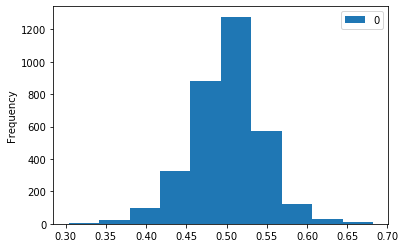

In [58]:
ynew=regr.predict(x_test)
pd.DataFrame(ynew).plot.hist()
sklearn.metrics.r2_score(y_test, ynew)

In [154]:
del ynew

In [59]:
labs=5
c = sklearn.metrics.confusion_matrix(pd.qcut(y_test.values[:,0], labs, range(labs,0,-1)),pd.qcut(ynew, labs, range(labs,0,-1)))
c 

array([[126, 132, 137, 134, 138],
       [150, 148, 125, 145, 101],
       [177, 136, 117, 116, 118],
       [129, 133, 162, 126, 118],
       [ 86, 119, 127, 147, 194]], dtype=int64)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Concatenate, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

In [61]:
'''Model 1:  MLP Classification'''
cross_sectional_inputs = Input(shape=(83,))

h1=Dense(128, activation='relu')(cross_sectional_inputs)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(5, activation='softmax')(h3)

mlp_model=tf.keras.Model(inputs=cross_sectional_inputs, outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
mlp_model.compile(
    optimizer=opt, loss='CategoricalCrossentropy',metrics=['accuracy']
)

In [62]:
start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = df[all_cols].values
y = pd.get_dummies(pd.qcut(df[Y].values[:,0], 5, range(0,5))).values 

x_train, y_train=sklearn.utils.shuffle(x[mask_train['DATE'],:], y[mask_train['DATE']],random_state=0)
x_test, y_test = x[mask_test['DATE'],:], y[mask_test['DATE']]

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/example1_class_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=5e-5, mode='min')

history_mlp=mlp_model.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

Epoch 1/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5751 - accuracy: 0.2656 - val_loss: 1.5724 - val_accuracy: 0.2667
Epoch 2/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5660 - accuracy: 0.2726 - val_loss: 1.5656 - val_accuracy: 0.2732
Epoch 3/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5615 - accuracy: 0.2750 - val_loss: 1.5612 - val_accuracy: 0.2754
Epoch 4/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5584 - accuracy: 0.2769 - val_loss: 1.5593 - val_accuracy: 0.2744
Epoch 5/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5556 - accuracy: 0.2798 - val_loss: 1.5613 - val_accuracy: 0.2748
Epoch 6/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5537 - accuracy: 0.2809 - val_loss: 1.5594 - val_accuracy: 0.2772
Epoch 7/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5518 - accuracy: 0.2819 - val_loss: 1.5582 - val_ac

In [155]:
del x
x=None

-1.0335724313170904

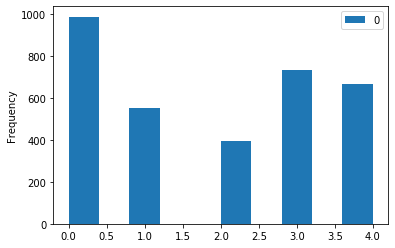

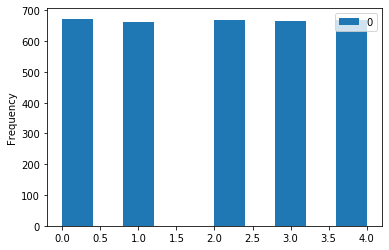

In [63]:
ynew=mlp_model.predict(x_test)
pd.DataFrame(ynew.argmax(axis=1)).plot.hist()
pd.DataFrame(y_test.argmax(axis=1)).plot.hist()
sk.metrics.r2_score(y_test.argmax(axis=1), ynew.argmax(axis=1))

In [64]:
c=sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), ynew.argmax(axis=1))
c

array([[335,  72,  31,  67, 168],
       [173, 108,  86, 156, 140],
       [171, 115,  76, 177, 129],
       [114, 143, 106, 196, 108],
       [195, 116,  98, 139, 122]], dtype=int64)

In [65]:
'''Model 1:  MLP Regression'''
cross_sectional_inputs = Input(shape=(83,))

h1=Dense(128, activation='relu')(cross_sectional_inputs)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(1, activation='sigmoid')(h3)

mlp_model=tf.keras.Model(inputs=cross_sectional_inputs, outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
mlp_model.compile(
    optimizer=opt, loss='binary_crossentropy',metrics=['binary_crossentropy','mean_squared_error','mean_absolute_error','mean_absolute_percentage_error']
)

In [66]:
start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = df[all_cols].values
y = df[Y].values[:,0]

x_train, y_train=sklearn.utils.shuffle(x[mask_train['DATE'],:], y[mask_train['DATE']],random_state=0)
x_test, y_test=x[mask_test['DATE'],:], y[mask_test['DATE']]

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/example2_reg_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

history_mlp=mlp_model.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

Epoch 1/100
1213/1213 [==============================] - 3s 3ms/step - loss: 0.6910 - binary_crossentropy: 0.6910 - mean_squared_error: 0.0822 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 344.8385 - val_loss: 0.6904 - val_binary_crossentropy: 0.6904 - val_mean_squared_error: 0.0822 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 309.9805
Epoch 2/100
1213/1213 [==============================] - 3s 3ms/step - loss: 0.6898 - binary_crossentropy: 0.6898 - mean_squared_error: 0.0816 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 342.4493 - val_loss: 0.6915 - val_binary_crossentropy: 0.6915 - val_mean_squared_error: 0.0827 - val_mean_absolute_error: 0.2476 - val_mean_absolute_percentage_error: 325.2656
Epoch 3/100
1213/1213 [==============================] - 3s 3ms/step - loss: 0.6892 - binary_crossentropy: 0.6892 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 339.9270 - val_loss: 0.6895

-0.033522221760808435

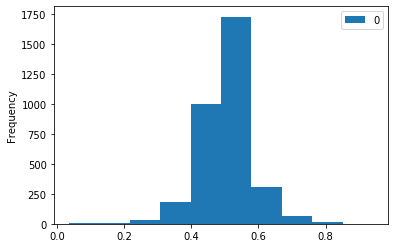

In [67]:
ynew=mlp_model.predict(x_test)
pd.DataFrame(ynew).plot.hist()
sk.metrics.r2_score(y_test, ynew)

In [68]:
labs=5
c = sklearn.metrics.confusion_matrix(pd.qcut(y_test, labs, range(0,labs)),pd.qcut(ynew[:,0], labs, range(0,labs)))
c

array([[183, 129, 128, 128, 105],
       [134, 139, 124, 129, 142],
       [129, 139, 126, 114, 156],
       [ 98, 129, 136, 157, 149],
       [125, 132, 154, 140, 116]], dtype=int64)

In [134]:
'''Model 2: LSTM + MLP'''
time_series_inputs = Input(shape=(12,1))
cross_sectional_inputs = Input(shape=(83,))

h1_rets=LSTM(units=50, return_sequences=True)(time_series_inputs)
time_series_output=LSTM(units=30, return_sequences=False)(h1_rets) 

combined_features = Concatenate()([cross_sectional_inputs, time_series_output])

h1=Dense(128, activation='relu')(combined_features)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(1, activation='sigmoid')(h3)

hybrid_model=tf.keras.Model(inputs=[cross_sectional_inputs,time_series_inputs], outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
hybrid_model.compile(
    optimizer=opt, loss='binary_crossentropy',metrics=['binary_crossentropy','mean_squared_error','mean_absolute_error','mean_absolute_percentage_error']
)

In [135]:
start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = [df[all_cols].values,df[time_series_cols].values]
y = df[Y].values[:,0]

x_train, x_test, y_train, y_test=[i[mask_train['DATE'],:] for i in x], [i[mask_test['DATE'],:] for i in x], y[mask_train['DATE']], y[mask_test['DATE']]

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/example3_hybrid_reg_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

history_hybrid=hybrid_model.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

Epoch 1/100
1213/1213 [==============================] - 10s 8ms/step - loss: 0.6905 - binary_crossentropy: 0.6905 - mean_squared_error: 0.0820 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 339.7402 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920 - val_mean_squared_error: 0.0827 - val_mean_absolute_error: 0.2487 - val_mean_absolute_percentage_error: 353.7748
Epoch 2/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6894 - binary_crossentropy: 0.6894 - mean_squared_error: 0.0814 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 338.3126 - val_loss: 0.6912 - val_binary_crossentropy: 0.6912 - val_mean_squared_error: 0.0823 - val_mean_absolute_error: 0.2474 - val_mean_absolute_percentage_error: 338.3136
Epoch 3/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6885 - binary_crossentropy: 0.6885 - mean_squared_error: 0.0810 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 336.0453 - val_loss: 0.692

-0.021345654142637782

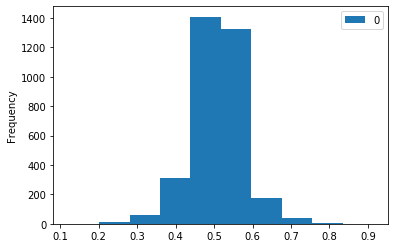

In [136]:
ynew=hybrid_model.predict(x_test)
pd.DataFrame(ynew).plot.hist()
sk.metrics.r2_score(y_test, ynew)

In [137]:
dates = pd.date_range('1971-01-31','2019-12-31')

In [20]:
dates = df['DATE'].unique()

In [139]:
import dateutil.relativedelta 



1970-12-31 00:00:00 1980-12-31 00:00:00
Epoch 1/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6820 - binary_crossentropy: 0.6820 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 322.8554 - val_loss: 0.6966 - val_binary_crossentropy: 0.6966 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2499 - val_mean_absolute_percentage_error: 339.5627
Epoch 2/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6819 - binary_crossentropy: 0.6819 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 322.0284 - val_loss: 0.6967 - val_binary_crossentropy: 0.6967 - val_mean_squared_error: 0.0849 - val_mean_absolute_error: 0.2499 - val_mean_absolute_percentage_error: 339.8515
Epoch 3/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6818 - binary_crossentropy: 0.6818 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2384 - mean_absolute_perce

Epoch 9/100
1225/1225 [==============================] - 9s 7ms/step - loss: 0.6816 - binary_crossentropy: 0.6816 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 321.1754 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_mean_squared_error: 0.0854 - val_mean_absolute_error: 0.2509 - val_mean_absolute_percentage_error: 342.9128
Epoch 10/100
1225/1225 [==============================] - 9s 7ms/step - loss: 0.6816 - binary_crossentropy: 0.6816 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 321.1748 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_mean_squared_error: 0.0854 - val_mean_absolute_error: 0.2509 - val_mean_absolute_percentage_error: 342.9121
Epoch 11/100
1221/1225 [============================>.] - ETA: 0s - loss: 0.6816 - binary_crossentropy: 0.6816 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 320.6789
Epoch 00011: ReduceL

Epoch 5/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.6818 - binary_crossentropy: 0.6818 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 322.0459 - val_loss: 0.6984 - val_binary_crossentropy: 0.6984 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2517 - val_mean_absolute_percentage_error: 339.5667
Epoch 6/100
1233/1236 [============================>.] - ETA: 0s - loss: 0.6818 - binary_crossentropy: 0.6818 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 322.0540
Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.99999937286777e-12.
1236/1236 [==============================] - 9s 7ms/step - loss: 0.6818 - binary_crossentropy: 0.6818 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 322.0459 - val_loss: 0.6984 - val_binary_crossentropy: 0.6984 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2517 - 

1254/1254 [==============================] - 10s 8ms/step - loss: 0.6825 - binary_crossentropy: 0.6825 - mean_squared_error: 0.0781 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 322.2391 - val_loss: 0.6967 - val_binary_crossentropy: 0.6967 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 350.1274
Epoch 10/100
1254/1254 [==============================] - 10s 8ms/step - loss: 0.6825 - binary_crossentropy: 0.6825 - mean_squared_error: 0.0781 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 322.2392 - val_loss: 0.6967 - val_binary_crossentropy: 0.6967 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 350.1274
Epoch 11/100
1251/1254 [============================>.] - ETA: 0s - loss: 0.6825 - binary_crossentropy: 0.6825 - mean_squared_error: 0.0781 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 322.4749
Epoch 00011: ReduceLROnPlateau

Epoch 6/100
1265/1266 [============================>.] - ETA: 0s - loss: 0.6829 - binary_crossentropy: 0.6829 - mean_squared_error: 0.0782 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 323.3158
Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.999999841327613e-22.
1266/1266 [==============================] - 9s 7ms/step - loss: 0.6829 - binary_crossentropy: 0.6829 - mean_squared_error: 0.0782 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 323.3140 - val_loss: 0.6960 - val_binary_crossentropy: 0.6960 - val_mean_squared_error: 0.0847 - val_mean_absolute_error: 0.2498 - val_mean_absolute_percentage_error: 347.4040
Epoch 7/100
1266/1266 [==============================] - 9s 7ms/step - loss: 0.6829 - binary_crossentropy: 0.6829 - mean_squared_error: 0.0782 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 323.3142 - val_loss: 0.6960 - val_binary_crossentropy: 0.6960 - val_mean_squared_error: 0.0847 - val_mean_absolute_error: 0.2498 -

1283/1283 [==============================] - 9s 7ms/step - loss: 0.6833 - binary_crossentropy: 0.6833 - mean_squared_error: 0.0785 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 324.5202 - val_loss: 0.6952 - val_binary_crossentropy: 0.6952 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2489 - val_mean_absolute_percentage_error: 341.4435
Epoch 11/100
1281/1283 [============================>.] - ETA: 0s - loss: 0.6833 - binary_crossentropy: 0.6833 - mean_squared_error: 0.0784 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 324.6426
Epoch 00011: ReduceLROnPlateau reducing learning rate to 5.000000136226006e-29.
1283/1283 [==============================] - 9s 7ms/step - loss: 0.6833 - binary_crossentropy: 0.6833 - mean_squared_error: 0.0785 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 324.5204 - val_loss: 0.6952 - val_binary_crossentropy: 0.6952 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2489 - val_mean_a

Epoch 7/100
1296/1296 [==============================] - 9s 7ms/step - loss: 0.6835 - binary_crossentropy: 0.6835 - mean_squared_error: 0.0786 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 325.2081 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942 - val_mean_squared_error: 0.0837 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 342.0551
Epoch 8/100
1296/1296 [==============================] - 9s 7ms/step - loss: 0.6835 - binary_crossentropy: 0.6835 - mean_squared_error: 0.0786 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 325.2079 - val_loss: 0.6942 - val_binary_crossentropy: 0.6942 - val_mean_squared_error: 0.0837 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 342.0551
Epoch 9/100
1296/1296 [==============================] - 9s 7ms/step - loss: 0.6835 - binary_crossentropy: 0.6835 - mean_squared_error: 0.0786 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 325.2083 - val_loss: 0.6942

Epoch 4/100
1309/1309 [==============================] - 9s 7ms/step - loss: 0.6839 - binary_crossentropy: 0.6839 - mean_squared_error: 0.0787 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 325.5088 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929 - val_mean_squared_error: 0.0831 - val_mean_absolute_error: 0.2472 - val_mean_absolute_percentage_error: 347.5718
Epoch 5/100
1309/1309 [==============================] - 9s 7ms/step - loss: 0.6839 - binary_crossentropy: 0.6839 - mean_squared_error: 0.0787 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 325.5085 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929 - val_mean_squared_error: 0.0831 - val_mean_absolute_error: 0.2472 - val_mean_absolute_percentage_error: 347.5718
Epoch 6/100
1303/1309 [============================>.] - ETA: 0s - loss: 0.6839 - binary_crossentropy: 0.6839 - mean_squared_error: 0.0787 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 325.1689
Epoch 00006: ReduceLRO

1972-05-31 00:00:00 1982-05-31 00:00:00
Epoch 1/100
1322/1322 [==============================] - 9s 7ms/step - loss: 0.6842 - binary_crossentropy: 0.6842 - mean_squared_error: 0.0789 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 326.4871 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920 - val_mean_squared_error: 0.0826 - val_mean_absolute_error: 0.2466 - val_mean_absolute_percentage_error: 345.1507
Epoch 2/100
1322/1322 [==============================] - 9s 7ms/step - loss: 0.6842 - binary_crossentropy: 0.6842 - mean_squared_error: 0.0789 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 326.4870 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920 - val_mean_squared_error: 0.0826 - val_mean_absolute_error: 0.2466 - val_mean_absolute_percentage_error: 345.1507
Epoch 3/100
1322/1322 [==============================] - 9s 7ms/step - loss: 0.6842 - binary_crossentropy: 0.6842 - mean_squared_error: 0.0789 - mean_absolute_error: 0.2403 - mean_absolute_perce

Epoch 9/100
1328/1328 [==============================] - 9s 7ms/step - loss: 0.6843 - binary_crossentropy: 0.6843 - mean_squared_error: 0.0789 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 327.3758 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922 - val_mean_squared_error: 0.0828 - val_mean_absolute_error: 0.2470 - val_mean_absolute_percentage_error: 341.1537
Epoch 10/100
1328/1328 [==============================] - 9s 7ms/step - loss: 0.6843 - binary_crossentropy: 0.6843 - mean_squared_error: 0.0789 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 327.3752 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922 - val_mean_squared_error: 0.0828 - val_mean_absolute_error: 0.2470 - val_mean_absolute_percentage_error: 341.1537
Epoch 11/100
1326/1328 [============================>.] - ETA: 0s - loss: 0.6843 - binary_crossentropy: 0.6843 - mean_squared_error: 0.0789 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 327.4893
Epoch 00011: ReduceL

Epoch 6/100
1335/1341 [============================>.] - ETA: 0s - loss: 0.6845 - binary_crossentropy: 0.6845 - mean_squared_error: 0.0790 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 326.6499
Epoch 00006: ReduceLROnPlateau reducing learning rate to 5.6051938572992686e-46.
1341/1341 [==============================] - 9s 7ms/step - loss: 0.6845 - binary_crossentropy: 0.6845 - mean_squared_error: 0.0790 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 327.2193 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922 - val_mean_squared_error: 0.0828 - val_mean_absolute_error: 0.2469 - val_mean_absolute_percentage_error: 348.7855
Epoch 7/100
1341/1341 [==============================] - 9s 7ms/step - loss: 0.6845 - binary_crossentropy: 0.6845 - mean_squared_error: 0.0790 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 327.2191 - val_loss: 0.6922 - val_binary_crossentropy: 0.6922 - val_mean_squared_error: 0.0828 - val_mean_absolute_error: 0.2469 

1367/1367 [==============================] - 10s 7ms/step - loss: 0.6850 - binary_crossentropy: 0.6850 - mean_squared_error: 0.0792 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 328.2303 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0847 - val_mean_absolute_error: 0.2501 - val_mean_absolute_percentage_error: 356.1096
Epoch 4/100
1367/1367 [==============================] - 10s 7ms/step - loss: 0.6850 - binary_crossentropy: 0.6850 - mean_squared_error: 0.0792 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 328.2307 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0847 - val_mean_absolute_error: 0.2501 - val_mean_absolute_percentage_error: 356.1096
Epoch 5/100
1367/1367 [==============================] - 10s 7ms/step - loss: 0.6850 - binary_crossentropy: 0.6850 - mean_squared_error: 0.0792 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 328.2306 - val_loss: 0.6963 - val_bi

1385/1385 [==============================] - 10s 7ms/step - loss: 0.6855 - binary_crossentropy: 0.6855 - mean_squared_error: 0.0795 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 329.3873 - val_loss: 0.7001 - val_binary_crossentropy: 0.7001 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 352.0594
Epoch 2/100
1385/1385 [==============================] - 10s 7ms/step - loss: 0.6855 - binary_crossentropy: 0.6855 - mean_squared_error: 0.0795 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 329.3874 - val_loss: 0.7001 - val_binary_crossentropy: 0.7001 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 352.0594
Epoch 3/100
1385/1385 [==============================] - 10s 7ms/step - loss: 0.6855 - binary_crossentropy: 0.6855 - mean_squared_error: 0.0795 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 329.3875 - val_loss: 0.7001 - val_bi

1392/1392 [==============================] - 9s 7ms/step - loss: 0.6860 - binary_crossentropy: 0.6860 - mean_squared_error: 0.0797 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 329.9962 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 351.3487
Epoch 11/100
1392/1392 [==============================] - 9s 7ms/step - loss: 0.6860 - binary_crossentropy: 0.6860 - mean_squared_error: 0.0797 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 329.9961 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 351.3487
1973-08-31 00:00:00 1983-08-31 00:00:00
Epoch 1/100
1395/1395 [==============================] - 9s 7ms/step - loss: 0.6863 - binary_crossentropy: 0.6863 - mean_squared_error: 0.0798 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error

1404/1404 [==============================] - 9s 7ms/step - loss: 0.6869 - binary_crossentropy: 0.6869 - mean_squared_error: 0.0802 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 332.2331 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 348.6162
Epoch 9/100
1404/1404 [==============================] - 10s 7ms/step - loss: 0.6869 - binary_crossentropy: 0.6869 - mean_squared_error: 0.0802 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 332.2333 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 348.6162
Epoch 10/100
1404/1404 [==============================] - 10s 7ms/step - loss: 0.6869 - binary_crossentropy: 0.6869 - mean_squared_error: 0.0802 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 332.2335 - val_loss: 0.6989 - val_bi

1417/1417 [==============================] - 10s 7ms/step - loss: 0.6880 - binary_crossentropy: 0.6880 - mean_squared_error: 0.0807 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 332.6668 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933 - val_mean_squared_error: 0.0832 - val_mean_absolute_error: 0.2476 - val_mean_absolute_percentage_error: 359.1228
Epoch 7/100
1417/1417 [==============================] - 10s 7ms/step - loss: 0.6880 - binary_crossentropy: 0.6880 - mean_squared_error: 0.0807 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 332.6671 - val_loss: 0.6933 - val_binary_crossentropy: 0.6933 - val_mean_squared_error: 0.0832 - val_mean_absolute_error: 0.2476 - val_mean_absolute_percentage_error: 359.1228
Epoch 8/100
1417/1417 [==============================] - 10s 7ms/step - loss: 0.6880 - binary_crossentropy: 0.6880 - mean_squared_error: 0.0807 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 332.6672 - val_loss: 0.6933 - val_bi

1431/1431 [==============================] - 10s 7ms/step - loss: 0.6886 - binary_crossentropy: 0.6886 - mean_squared_error: 0.0809 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 333.6110 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923 - val_mean_squared_error: 0.0827 - val_mean_absolute_error: 0.2463 - val_mean_absolute_percentage_error: 359.3513
Epoch 5/100
1431/1431 [==============================] - 10s 7ms/step - loss: 0.6886 - binary_crossentropy: 0.6886 - mean_squared_error: 0.0809 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 333.6109 - val_loss: 0.6923 - val_binary_crossentropy: 0.6923 - val_mean_squared_error: 0.0827 - val_mean_absolute_error: 0.2463 - val_mean_absolute_percentage_error: 359.3513
Epoch 6/100
1431/1431 [==============================] - 10s 7ms/step - loss: 0.6886 - binary_crossentropy: 0.6886 - mean_squared_error: 0.0809 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 333.6110 - val_loss: 0.6923 - val_bi

1446/1446 [==============================] - 10s 7ms/step - loss: 0.6890 - binary_crossentropy: 0.6890 - mean_squared_error: 0.0811 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 335.7117 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916 - val_mean_squared_error: 0.0823 - val_mean_absolute_error: 0.2451 - val_mean_absolute_percentage_error: 360.2841
Epoch 3/100
1446/1446 [==============================] - 10s 7ms/step - loss: 0.6890 - binary_crossentropy: 0.6890 - mean_squared_error: 0.0811 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 335.7121 - val_loss: 0.6916 - val_binary_crossentropy: 0.6916 - val_mean_squared_error: 0.0823 - val_mean_absolute_error: 0.2451 - val_mean_absolute_percentage_error: 360.2841
Epoch 4/100
1446/1446 [==============================] - 10s 7ms/step - loss: 0.6890 - binary_crossentropy: 0.6890 - mean_squared_error: 0.0811 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 335.7120 - val_loss: 0.6916 - val_bi

1457/1457 [==============================] - 10s 7ms/step - loss: 0.6893 - binary_crossentropy: 0.6893 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 337.2008 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935 - val_mean_squared_error: 0.0833 - val_mean_absolute_error: 0.2467 - val_mean_absolute_percentage_error: 357.5922
1975-03-31 00:00:00 1985-03-31 00:00:00
Epoch 1/100
1461/1461 [==============================] - 10s 7ms/step - loss: 0.6894 - binary_crossentropy: 0.6894 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 337.5134 - val_loss: 0.6929 - val_binary_crossentropy: 0.6929 - val_mean_squared_error: 0.0830 - val_mean_absolute_error: 0.2464 - val_mean_absolute_percentage_error: 358.0110
Epoch 2/100
1461/1461 [==============================] - 10s 7ms/step - loss: 0.6894 - binary_crossentropy: 0.6894 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2444 - mean_absolute_percentage_err

1472/1472 [==============================] - 10s 7ms/step - loss: 0.6895 - binary_crossentropy: 0.6895 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 338.5516 - val_loss: 0.6946 - val_binary_crossentropy: 0.6946 - val_mean_squared_error: 0.0840 - val_mean_absolute_error: 0.2480 - val_mean_absolute_percentage_error: 357.4908
Epoch 10/100
1472/1472 [==============================] - 10s 7ms/step - loss: 0.6895 - binary_crossentropy: 0.6895 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 338.5516 - val_loss: 0.6946 - val_binary_crossentropy: 0.6946 - val_mean_squared_error: 0.0840 - val_mean_absolute_error: 0.2480 - val_mean_absolute_percentage_error: 357.4908
Epoch 11/100
1472/1472 [==============================] - 10s 7ms/step - loss: 0.6895 - binary_crossentropy: 0.6895 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 338.5518 - val_loss: 0.6946 - val_

1485/1485 [==============================] - 10s 7ms/step - loss: 0.6899 - binary_crossentropy: 0.6899 - mean_squared_error: 0.0815 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 339.9597 - val_loss: 0.6946 - val_binary_crossentropy: 0.6946 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2485 - val_mean_absolute_percentage_error: 359.9323
Epoch 8/100
1485/1485 [==============================] - 10s 7ms/step - loss: 0.6899 - binary_crossentropy: 0.6899 - mean_squared_error: 0.0815 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 339.9603 - val_loss: 0.6946 - val_binary_crossentropy: 0.6946 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2485 - val_mean_absolute_percentage_error: 359.9323
Epoch 9/100
1485/1485 [==============================] - 10s 7ms/step - loss: 0.6899 - binary_crossentropy: 0.6899 - mean_squared_error: 0.0815 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 339.9602 - val_loss: 0.6946 - val_bi

1498/1498 [==============================] - 10s 7ms/step - loss: 0.6903 - binary_crossentropy: 0.6903 - mean_squared_error: 0.0817 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 341.0278 - val_loss: 0.6958 - val_binary_crossentropy: 0.6958 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2492 - val_mean_absolute_percentage_error: 365.5335
Epoch 6/100
1498/1498 [==============================] - 10s 7ms/step - loss: 0.6903 - binary_crossentropy: 0.6903 - mean_squared_error: 0.0817 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 341.0278 - val_loss: 0.6958 - val_binary_crossentropy: 0.6958 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2492 - val_mean_absolute_percentage_error: 365.5335
Epoch 7/100
1498/1498 [==============================] - 10s 7ms/step - loss: 0.6903 - binary_crossentropy: 0.6903 - mean_squared_error: 0.0817 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 341.0281 - val_loss: 0.6958 - val_bi

1512/1512 [==============================] - 10s 7ms/step - loss: 0.6907 - binary_crossentropy: 0.6907 - mean_squared_error: 0.0819 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 341.7743 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_mean_squared_error: 0.0845 - val_mean_absolute_error: 0.2491 - val_mean_absolute_percentage_error: 372.6865
Epoch 4/100
1512/1512 [==============================] - 10s 7ms/step - loss: 0.6907 - binary_crossentropy: 0.6907 - mean_squared_error: 0.0819 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 341.7743 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_mean_squared_error: 0.0845 - val_mean_absolute_error: 0.2491 - val_mean_absolute_percentage_error: 372.6865
Epoch 5/100
1512/1512 [==============================] - 10s 7ms/step - loss: 0.6907 - binary_crossentropy: 0.6907 - mean_squared_error: 0.0819 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 341.7740 - val_loss: 0.6957 - val_bi

1526/1526 [==============================] - 10s 7ms/step - loss: 0.6911 - binary_crossentropy: 0.6911 - mean_squared_error: 0.0821 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 344.1701 - val_loss: 0.6945 - val_binary_crossentropy: 0.6945 - val_mean_squared_error: 0.0840 - val_mean_absolute_error: 0.2483 - val_mean_absolute_percentage_error: 355.6407
Epoch 2/100
1526/1526 [==============================] - 10s 7ms/step - loss: 0.6911 - binary_crossentropy: 0.6911 - mean_squared_error: 0.0821 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 344.1696 - val_loss: 0.6945 - val_binary_crossentropy: 0.6945 - val_mean_squared_error: 0.0840 - val_mean_absolute_error: 0.2483 - val_mean_absolute_percentage_error: 355.6407
Epoch 3/100
1526/1526 [==============================] - 10s 7ms/step - loss: 0.6911 - binary_crossentropy: 0.6911 - mean_squared_error: 0.0821 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 344.1696 - val_loss: 0.6945 - val_bi

1537/1537 [==============================] - 11s 7ms/step - loss: 0.6916 - binary_crossentropy: 0.6916 - mean_squared_error: 0.0824 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 345.1382 - val_loss: 0.6939 - val_binary_crossentropy: 0.6939 - val_mean_squared_error: 0.0837 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 359.7323
Epoch 11/100
1537/1537 [==============================] - 11s 7ms/step - loss: 0.6916 - binary_crossentropy: 0.6916 - mean_squared_error: 0.0824 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 345.1388 - val_loss: 0.6939 - val_binary_crossentropy: 0.6939 - val_mean_squared_error: 0.0837 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 359.7323
1977-02-28 00:00:00 1987-02-28 00:00:00
Epoch 1/100
1541/1541 [==============================] - 11s 7ms/step - loss: 0.6918 - binary_crossentropy: 0.6918 - mean_squared_error: 0.0824 - mean_absolute_error: 0.2460 - mean_absolute_percentage_er

1553/1553 [==============================] - 11s 7ms/step - loss: 0.6920 - binary_crossentropy: 0.6920 - mean_squared_error: 0.0825 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 345.8740 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2489 - val_mean_absolute_percentage_error: 364.9035
Epoch 9/100
1553/1553 [==============================] - 11s 7ms/step - loss: 0.6920 - binary_crossentropy: 0.6920 - mean_squared_error: 0.0825 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 345.8738 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2489 - val_mean_absolute_percentage_error: 364.9035
Epoch 10/100
1553/1553 [==============================] - 11s 7ms/step - loss: 0.6920 - binary_crossentropy: 0.6920 - mean_squared_error: 0.0825 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 345.8736 - val_loss: 0.6950 - val_b

1570/1570 [==============================] - 12s 7ms/step - loss: 0.6922 - binary_crossentropy: 0.6922 - mean_squared_error: 0.0826 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 346.5216 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_mean_squared_error: 0.0844 - val_mean_absolute_error: 0.2497 - val_mean_absolute_percentage_error: 364.3896
Epoch 7/100
1570/1570 [==============================] - 12s 8ms/step - loss: 0.6922 - binary_crossentropy: 0.6922 - mean_squared_error: 0.0826 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 346.5212 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_mean_squared_error: 0.0844 - val_mean_absolute_error: 0.2497 - val_mean_absolute_percentage_error: 364.3896
Epoch 8/100
1570/1570 [==============================] - 12s 7ms/step - loss: 0.6922 - binary_crossentropy: 0.6922 - mean_squared_error: 0.0826 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 346.5219 - val_loss: 0.6956 - val_bi

1589/1589 [==============================] - 11s 7ms/step - loss: 0.6926 - binary_crossentropy: 0.6926 - mean_squared_error: 0.0828 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 348.5751 - val_loss: 0.6937 - val_binary_crossentropy: 0.6937 - val_mean_squared_error: 0.0834 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 348.6833
Epoch 5/100
1589/1589 [==============================] - 11s 7ms/step - loss: 0.6926 - binary_crossentropy: 0.6926 - mean_squared_error: 0.0828 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 348.5755 - val_loss: 0.6937 - val_binary_crossentropy: 0.6937 - val_mean_squared_error: 0.0834 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 348.6833
Epoch 6/100
1589/1589 [==============================] - 11s 7ms/step - loss: 0.6926 - binary_crossentropy: 0.6926 - mean_squared_error: 0.0828 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 348.5752 - val_loss: 0.6937 - val_bi

1605/1605 [==============================] - 11s 7ms/step - loss: 0.6930 - binary_crossentropy: 0.6930 - mean_squared_error: 0.0830 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 349.1947 - val_loss: 0.6936 - val_binary_crossentropy: 0.6936 - val_mean_squared_error: 0.0833 - val_mean_absolute_error: 0.2475 - val_mean_absolute_percentage_error: 349.0226
Epoch 3/100
1605/1605 [==============================] - 11s 7ms/step - loss: 0.6930 - binary_crossentropy: 0.6930 - mean_squared_error: 0.0830 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 349.1951 - val_loss: 0.6936 - val_binary_crossentropy: 0.6936 - val_mean_squared_error: 0.0833 - val_mean_absolute_error: 0.2475 - val_mean_absolute_percentage_error: 349.0226
Epoch 4/100
1605/1605 [==============================] - 11s 7ms/step - loss: 0.6930 - binary_crossentropy: 0.6930 - mean_squared_error: 0.0830 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 349.1952 - val_loss: 0.6936 - val_bi

1618/1618 [==============================] - 12s 8ms/step - loss: 0.6931 - binary_crossentropy: 0.6931 - mean_squared_error: 0.0831 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 349.8067 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2482 - val_mean_absolute_percentage_error: 348.4099
1978-09-30 00:00:00 1988-09-30 00:00:00
Epoch 1/100
1622/1622 [==============================] - 13s 8ms/step - loss: 0.6931 - binary_crossentropy: 0.6931 - mean_squared_error: 0.0831 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 350.0115 - val_loss: 0.6951 - val_binary_crossentropy: 0.6951 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 353.2340
Epoch 2/100
1622/1622 [==============================] - 12s 8ms/step - loss: 0.6931 - binary_crossentropy: 0.6931 - mean_squared_error: 0.0831 - mean_absolute_error: 0.2470 - mean_absolute_percentage_err

1634/1634 [==============================] - 12s 7ms/step - loss: 0.6935 - binary_crossentropy: 0.6935 - mean_squared_error: 0.0833 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 350.3071 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_mean_squared_error: 0.0836 - val_mean_absolute_error: 0.2477 - val_mean_absolute_percentage_error: 356.3727
Epoch 10/100
1634/1634 [==============================] - 12s 7ms/step - loss: 0.6935 - binary_crossentropy: 0.6935 - mean_squared_error: 0.0833 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 350.3068 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_mean_squared_error: 0.0836 - val_mean_absolute_error: 0.2477 - val_mean_absolute_percentage_error: 356.3727
Epoch 11/100
1634/1634 [==============================] - 12s 7ms/step - loss: 0.6935 - binary_crossentropy: 0.6935 - mean_squared_error: 0.0833 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 350.3072 - val_loss: 0.6950 - val_

1647/1647 [==============================] - 12s 7ms/step - loss: 0.6940 - binary_crossentropy: 0.6940 - mean_squared_error: 0.0835 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 350.7253 - val_loss: 0.6952 - val_binary_crossentropy: 0.6952 - val_mean_squared_error: 0.0839 - val_mean_absolute_error: 0.2482 - val_mean_absolute_percentage_error: 362.2064
Epoch 8/100
1647/1647 [==============================] - 12s 7ms/step - loss: 0.6940 - binary_crossentropy: 0.6940 - mean_squared_error: 0.0835 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 350.7250 - val_loss: 0.6952 - val_binary_crossentropy: 0.6952 - val_mean_squared_error: 0.0839 - val_mean_absolute_error: 0.2482 - val_mean_absolute_percentage_error: 362.2064
Epoch 9/100
1647/1647 [==============================] - 12s 7ms/step - loss: 0.6940 - binary_crossentropy: 0.6940 - mean_squared_error: 0.0835 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 350.7247 - val_loss: 0.6952 - val_bi

1659/1659 [==============================] - 12s 7ms/step - loss: 0.6943 - binary_crossentropy: 0.6943 - mean_squared_error: 0.0836 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 350.8067 - val_loss: 0.6948 - val_binary_crossentropy: 0.6948 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2479 - val_mean_absolute_percentage_error: 372.7622
Epoch 6/100
1659/1659 [==============================] - 12s 7ms/step - loss: 0.6943 - binary_crossentropy: 0.6943 - mean_squared_error: 0.0836 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 350.8065 - val_loss: 0.6948 - val_binary_crossentropy: 0.6948 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2479 - val_mean_absolute_percentage_error: 372.7622
Epoch 7/100
1659/1659 [==============================] - 12s 7ms/step - loss: 0.6943 - binary_crossentropy: 0.6943 - mean_squared_error: 0.0836 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 350.8063 - val_loss: 0.6948 - val_bi

1671/1671 [==============================] - 12s 7ms/step - loss: 0.6947 - binary_crossentropy: 0.6947 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 353.2943 - val_loss: 0.6945 - val_binary_crossentropy: 0.6945 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2477 - val_mean_absolute_percentage_error: 359.4043
Epoch 4/100
1671/1671 [==============================] - 12s 7ms/step - loss: 0.6947 - binary_crossentropy: 0.6947 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 353.2944 - val_loss: 0.6945 - val_binary_crossentropy: 0.6945 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2477 - val_mean_absolute_percentage_error: 359.4043
Epoch 5/100
1671/1671 [==============================] - 12s 7ms/step - loss: 0.6947 - binary_crossentropy: 0.6947 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 353.2943 - val_loss: 0.6945 - val_bi

1682/1682 [==============================] - 12s 7ms/step - loss: 0.6952 - binary_crossentropy: 0.6952 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 354.0151 - val_loss: 0.6951 - val_binary_crossentropy: 0.6951 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 361.9249
Epoch 2/100
1682/1682 [==============================] - 12s 7ms/step - loss: 0.6952 - binary_crossentropy: 0.6952 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 354.0151 - val_loss: 0.6951 - val_binary_crossentropy: 0.6951 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 361.9249
Epoch 3/100
1682/1682 [==============================] - 12s 7ms/step - loss: 0.6952 - binary_crossentropy: 0.6952 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 354.0146 - val_loss: 0.6951 - val_bi

1690/1690 [==============================] - 12s 7ms/step - loss: 0.6951 - binary_crossentropy: 0.6951 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 354.9827 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 359.6960
Epoch 11/100
1690/1690 [==============================] - 12s 7ms/step - loss: 0.6951 - binary_crossentropy: 0.6951 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 354.9824 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 359.6960
1980-08-31 00:00:00 1990-08-31 00:00:00
Epoch 1/100
1693/1693 [==============================] - 12s 7ms/step - loss: 0.6950 - binary_crossentropy: 0.6950 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2485 - mean_absolute_percentage_er

1702/1702 [==============================] - 12s 7ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 356.2041 - val_loss: 0.6954 - val_binary_crossentropy: 0.6954 - val_mean_squared_error: 0.0839 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 351.7894
Epoch 9/100
1702/1702 [==============================] - 12s 7ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 356.2043 - val_loss: 0.6954 - val_binary_crossentropy: 0.6954 - val_mean_squared_error: 0.0839 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 351.7894
Epoch 10/100
1702/1702 [==============================] - 12s 7ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 356.2038 - val_loss: 0.6954 - val_b

1713/1713 [==============================] - 12s 7ms/step - loss: 0.6950 - binary_crossentropy: 0.6950 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 356.3645 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_mean_squared_error: 0.0840 - val_mean_absolute_error: 0.2483 - val_mean_absolute_percentage_error: 349.7360
Epoch 7/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.6950 - binary_crossentropy: 0.6950 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 356.3643 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_mean_squared_error: 0.0840 - val_mean_absolute_error: 0.2483 - val_mean_absolute_percentage_error: 349.7360
Epoch 8/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.6950 - binary_crossentropy: 0.6950 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 356.3646 - val_loss: 0.6956 - val_bi

1723/1723 [==============================] - 13s 7ms/step - loss: 0.6949 - binary_crossentropy: 0.6949 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 356.6637 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2493 - val_mean_absolute_percentage_error: 349.2897
Epoch 5/100
1723/1723 [==============================] - 13s 7ms/step - loss: 0.6949 - binary_crossentropy: 0.6949 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 356.6637 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2493 - val_mean_absolute_percentage_error: 349.2897
Epoch 6/100
1723/1723 [==============================] - 13s 8ms/step - loss: 0.6949 - binary_crossentropy: 0.6949 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 356.6637 - val_loss: 0.6963 - val_bi

1732/1732 [==============================] - 13s 7ms/step - loss: 0.6949 - binary_crossentropy: 0.6949 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 356.6218 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2504 - val_mean_absolute_percentage_error: 355.2072
Epoch 3/100
1732/1732 [==============================] - 13s 7ms/step - loss: 0.6949 - binary_crossentropy: 0.6949 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 356.6216 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2504 - val_mean_absolute_percentage_error: 355.2072
Epoch 4/100
1732/1732 [==============================] - 13s 7ms/step - loss: 0.6949 - binary_crossentropy: 0.6949 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 356.6212 - val_loss: 0.6974 - val_bi

1739/1739 [==============================] - 13s 7ms/step - loss: 0.6951 - binary_crossentropy: 0.6951 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 356.9066 - val_loss: 0.6967 - val_binary_crossentropy: 0.6967 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2497 - val_mean_absolute_percentage_error: 357.7421
1982-03-31 00:00:00 1992-03-31 00:00:00
Epoch 1/100
1741/1741 [==============================] - 13s 7ms/step - loss: 0.6951 - binary_crossentropy: 0.6951 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 356.8758 - val_loss: 0.6964 - val_binary_crossentropy: 0.6964 - val_mean_squared_error: 0.0847 - val_mean_absolute_error: 0.2496 - val_mean_absolute_percentage_error: 358.9597
Epoch 2/100
1741/1741 [==============================] - 13s 7ms/step - loss: 0.6951 - binary_crossentropy: 0.6951 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2484 - mean_absolute_percentage_err

1748/1748 [==============================] - 13s 7ms/step - loss: 0.6952 - binary_crossentropy: 0.6952 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 357.0721 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_mean_squared_error: 0.0842 - val_mean_absolute_error: 0.2488 - val_mean_absolute_percentage_error: 366.7843
Epoch 10/100
1748/1748 [==============================] - 13s 7ms/step - loss: 0.6952 - binary_crossentropy: 0.6952 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 357.0724 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_mean_squared_error: 0.0842 - val_mean_absolute_error: 0.2488 - val_mean_absolute_percentage_error: 366.7843
Epoch 11/100
1748/1748 [==============================] - 13s 7ms/step - loss: 0.6952 - binary_crossentropy: 0.6952 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 357.0722 - val_loss: 0.6957 - val_

1756/1756 [==============================] - 13s 7ms/step - loss: 0.6953 - binary_crossentropy: 0.6953 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 357.3072 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_mean_squared_error: 0.0842 - val_mean_absolute_error: 0.2488 - val_mean_absolute_percentage_error: 366.6389
Epoch 8/100
1756/1756 [==============================] - 13s 7ms/step - loss: 0.6953 - binary_crossentropy: 0.6953 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 357.3073 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_mean_squared_error: 0.0842 - val_mean_absolute_error: 0.2488 - val_mean_absolute_percentage_error: 366.6389
Epoch 9/100
1756/1756 [==============================] - 14s 8ms/step - loss: 0.6953 - binary_crossentropy: 0.6953 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 357.3068 - val_loss: 0.6956 - val_bi

1765/1765 [==============================] - 13s 7ms/step - loss: 0.6951 - binary_crossentropy: 0.6951 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 357.5184 - val_loss: 0.6947 - val_binary_crossentropy: 0.6947 - val_mean_squared_error: 0.0839 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 369.1600
Epoch 6/100
1765/1765 [==============================] - 13s 7ms/step - loss: 0.6951 - binary_crossentropy: 0.6951 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 357.5186 - val_loss: 0.6947 - val_binary_crossentropy: 0.6947 - val_mean_squared_error: 0.0839 - val_mean_absolute_error: 0.2481 - val_mean_absolute_percentage_error: 369.1600
Epoch 7/100
1765/1765 [==============================] - 13s 7ms/step - loss: 0.6951 - binary_crossentropy: 0.6951 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 357.5183 - val_loss: 0.6947 - val_bi

1775/1775 [==============================] - 13s 7ms/step - loss: 0.6947 - binary_crossentropy: 0.6947 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 358.4471 - val_loss: 0.6960 - val_binary_crossentropy: 0.6960 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2494 - val_mean_absolute_percentage_error: 366.5337
Epoch 4/100
1775/1775 [==============================] - 12s 7ms/step - loss: 0.6947 - binary_crossentropy: 0.6947 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 358.4474 - val_loss: 0.6960 - val_binary_crossentropy: 0.6960 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2494 - val_mean_absolute_percentage_error: 366.5337
Epoch 5/100
1775/1775 [==============================] - 12s 7ms/step - loss: 0.6947 - binary_crossentropy: 0.6947 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 358.4475 - val_loss: 0.6960 - val_bi

1785/1785 [==============================] - 12s 7ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 358.6588 - val_loss: 0.6962 - val_binary_crossentropy: 0.6962 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2502 - val_mean_absolute_percentage_error: 369.3267
Epoch 2/100
1785/1785 [==============================] - 12s 7ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 358.6589 - val_loss: 0.6962 - val_binary_crossentropy: 0.6962 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2502 - val_mean_absolute_percentage_error: 369.3267
Epoch 3/100
1785/1785 [==============================] - 12s 7ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 358.6590 - val_loss: 0.6962 - val_bi

1793/1793 [==============================] - 12s 7ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 359.3307 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_mean_squared_error: 0.0853 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 366.8463
Epoch 11/100
1793/1793 [==============================] - 13s 7ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - mean_squared_error: 0.0838 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 359.3305 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_mean_squared_error: 0.0853 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 366.8463
1984-02-28 00:00:00 1994-02-28 00:00:00
Epoch 1/100
1797/1797 [==============================] - 13s 7ms/step - loss: 0.6949 - binary_crossentropy: 0.6949 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2481 - mean_absolute_percentage_er

1806/1806 [==============================] - 13s 7ms/step - loss: 0.6950 - binary_crossentropy: 0.6950 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 359.4984 - val_loss: 0.6969 - val_binary_crossentropy: 0.6969 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2501 - val_mean_absolute_percentage_error: 377.6442
Epoch 9/100
1806/1806 [==============================] - 13s 7ms/step - loss: 0.6950 - binary_crossentropy: 0.6950 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 359.4985 - val_loss: 0.6969 - val_binary_crossentropy: 0.6969 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2501 - val_mean_absolute_percentage_error: 377.6442
Epoch 10/100
1806/1806 [==============================] - 13s 7ms/step - loss: 0.6950 - binary_crossentropy: 0.6950 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 359.4986 - val_loss: 0.6969 - val_b

1821/1821 [==============================] - 60s 33ms/step - loss: 0.6953 - binary_crossentropy: 0.6953 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 359.1460 - val_loss: 0.6965 - val_binary_crossentropy: 0.6965 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 386.5876
Epoch 7/100
1821/1821 [==============================] - 59s 32ms/step - loss: 0.6953 - binary_crossentropy: 0.6953 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 359.1456 - val_loss: 0.6965 - val_binary_crossentropy: 0.6965 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 386.5876
Epoch 8/100
1821/1821 [==============================] - 36s 20ms/step - loss: 0.6953 - binary_crossentropy: 0.6953 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 359.1457 - val_loss: 0.6965 - val

1840/1840 [==============================] - 423s 230ms/step - loss: 0.6953 - binary_crossentropy: 0.6953 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 361.0617 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2493 - val_mean_absolute_percentage_error: 373.019310s - loss: 0.6954 - binary_crossentropy: 0.6954 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2487 - mean_absolute_percenta
Epoch 4/100
1840/1840 [==============================] - 201s 109ms/step - loss: 0.6953 - binary_crossentropy: 0.6953 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 361.0621 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2493 - val_mean_absolute_percentage_error: 373.0193
Epoch 5/100
1840/1840 [==============================] - 722s 393ms/step - loss: 0.6953 - binary_crossentr

1856/1856 [==============================] - 29s 16ms/step - loss: 0.6954 - binary_crossentropy: 0.6954 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 361.8198 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2498 - val_mean_absolute_percentage_error: 368.1158
1985-05-31 00:00:00 1995-05-31 00:00:00
Epoch 1/100
1861/1861 [==============================] - 27s 14ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 361.4874 - val_loss: 0.6966 - val_binary_crossentropy: 0.6966 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2502 - val_mean_absolute_percentage_error: 375.1576
Epoch 2/100
1861/1861 [==============================] - 29s 15ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2487 - mean_absolute_percentage_

Epoch 10/100
1867/1867 [==============================] - 17s 9ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 361.2685 - val_loss: 0.6973 - val_binary_crossentropy: 0.6973 - val_mean_squared_error: 0.0856 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 375.7470
Epoch 11/100
1867/1867 [==============================] - 17s 9ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 361.2686 - val_loss: 0.6973 - val_binary_crossentropy: 0.6973 - val_mean_squared_error: 0.0856 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 375.7470
1985-07-31 00:00:00 1995-07-31 00:00:00
Epoch 1/100
1873/1873 [==============================] - 18s 10ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0841 - mean_absolute_error: 0.2487 - mean_absolute

1890/1890 [==============================] - 27s 14ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 362.6530 - val_loss: 0.6964 - val_binary_crossentropy: 0.6964 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2506 - val_mean_absolute_percentage_error: 369.2848
Epoch 9/100
1890/1890 [==============================] - 24s 13ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 362.6536 - val_loss: 0.6964 - val_binary_crossentropy: 0.6964 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2506 - val_mean_absolute_percentage_error: 369.2848
Epoch 10/100
1890/1890 [==============================] - 18s 10ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 362.6536 - val_loss: 0.6964 - va

1915/1915 [==============================] - 14s 7ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 361.2236 - val_loss: 0.6967 - val_binary_crossentropy: 0.6967 - val_mean_squared_error: 0.0853 - val_mean_absolute_error: 0.2506 - val_mean_absolute_percentage_error: 391.3979
Epoch 7/100
1915/1915 [==============================] - 14s 7ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 361.2241 - val_loss: 0.6967 - val_binary_crossentropy: 0.6967 - val_mean_squared_error: 0.0853 - val_mean_absolute_error: 0.2506 - val_mean_absolute_percentage_error: 391.3979
Epoch 8/100
1915/1915 [==============================] - 14s 7ms/step - loss: 0.6955 - binary_crossentropy: 0.6955 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 361.2238 - val_loss: 0.6967 - val_bi

1941/1941 [==============================] - 14s 7ms/step - loss: 0.6956 - binary_crossentropy: 0.6956 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 362.0313 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_mean_squared_error: 0.0855 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 391.9023
Epoch 5/100
1941/1941 [==============================] - 14s 7ms/step - loss: 0.6956 - binary_crossentropy: 0.6956 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 362.0317 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_mean_squared_error: 0.0855 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 391.9023
Epoch 6/100
1941/1941 [==============================] - 14s 7ms/step - loss: 0.6956 - binary_crossentropy: 0.6956 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 362.0314 - val_loss: 0.6970 - val_bi

1968/1968 [==============================] - 15s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 364.2782 - val_loss: 0.6962 - val_binary_crossentropy: 0.6962 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2502 - val_mean_absolute_percentage_error: 387.1494
Epoch 3/100
1968/1968 [==============================] - 14s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 364.2779 - val_loss: 0.6962 - val_binary_crossentropy: 0.6962 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2502 - val_mean_absolute_percentage_error: 387.1494
Epoch 4/100
1968/1968 [==============================] - 15s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 364.2782 - val_loss: 0.6962 - val_bi

1989/1989 [==============================] - 15s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 363.6230 - val_loss: 0.6940 - val_binary_crossentropy: 0.6940 - val_mean_squared_error: 0.0838 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 403.9508
1987-02-28 00:00:00 1997-02-28 00:00:00
Epoch 1/100
1996/1996 [==============================] - 15s 7ms/step - loss: 0.6959 - binary_crossentropy: 0.6959 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 364.2093 - val_loss: 0.6937 - val_binary_crossentropy: 0.6937 - val_mean_squared_error: 0.0837 - val_mean_absolute_error: 0.2475 - val_mean_absolute_percentage_error: 399.5407
Epoch 2/100
1996/1996 [==============================] - 15s 7ms/step - loss: 0.6959 - binary_crossentropy: 0.6959 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2491 - mean_absolute_percentage_err

2018/2018 [==============================] - 15s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 365.3994 - val_loss: 0.6943 - val_binary_crossentropy: 0.6943 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2483 - val_mean_absolute_percentage_error: 397.6222
Epoch 10/100
2018/2018 [==============================] - 15s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 365.3995 - val_loss: 0.6943 - val_binary_crossentropy: 0.6943 - val_mean_squared_error: 0.0841 - val_mean_absolute_error: 0.2483 - val_mean_absolute_percentage_error: 397.6222
Epoch 11/100
2018/2018 [==============================] - 15s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 365.3989 - val_loss: 0.6943 - val_

2045/2045 [==============================] - 15s 7ms/step - loss: 0.6957 - binary_crossentropy: 0.6957 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 367.9341 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_mean_squared_error: 0.0844 - val_mean_absolute_error: 0.2490 - val_mean_absolute_percentage_error: 383.8339
Epoch 8/100
2045/2045 [==============================] - 15s 7ms/step - loss: 0.6957 - binary_crossentropy: 0.6957 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 367.9339 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950 - val_mean_squared_error: 0.0844 - val_mean_absolute_error: 0.2490 - val_mean_absolute_percentage_error: 383.8339
Epoch 9/100
2045/2045 [==============================] - 15s 7ms/step - loss: 0.6957 - binary_crossentropy: 0.6957 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 367.9344 - val_loss: 0.6950 - val_bi

2071/2071 [==============================] - 15s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 368.4485 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2503 - val_mean_absolute_percentage_error: 400.3059
Epoch 6/100
2071/2071 [==============================] - 15s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 368.4486 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2503 - val_mean_absolute_percentage_error: 400.3059
Epoch 7/100
2071/2071 [==============================] - 15s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 368.4486 - val_loss: 0.6956 - val_bi

2097/2097 [==============================] - 15s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 370.0737 - val_loss: 0.6958 - val_binary_crossentropy: 0.6958 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2503 - val_mean_absolute_percentage_error: 408.7481
Epoch 4/100
2097/2097 [==============================] - 15s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 370.0738 - val_loss: 0.6958 - val_binary_crossentropy: 0.6958 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2503 - val_mean_absolute_percentage_error: 408.7481
Epoch 5/100
2097/2097 [==============================] - 15s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 370.0735 - val_loss: 0.6958 - val_bi

2123/2123 [==============================] - 16s 8ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 372.0370 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2500 - val_mean_absolute_percentage_error: 405.8888
Epoch 2/100
2123/2123 [==============================] - 16s 8ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 372.0369 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2500 - val_mean_absolute_percentage_error: 405.8888
Epoch 3/100
2123/2123 [==============================] - 16s 7ms/step - loss: 0.6958 - binary_crossentropy: 0.6958 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 372.0371 - val_loss: 0.6963 - val_bi

2141/2141 [==============================] - 16s 7ms/step - loss: 0.6959 - binary_crossentropy: 0.6959 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 373.4724 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2501 - val_mean_absolute_percentage_error: 397.4075
Epoch 11/100
2141/2141 [==============================] - 16s 7ms/step - loss: 0.6959 - binary_crossentropy: 0.6959 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 373.4721 - val_loss: 0.6974 - val_binary_crossentropy: 0.6974 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2501 - val_mean_absolute_percentage_error: 397.4075
1989-01-31 00:00:00 1999-01-31 00:00:00
Epoch 1/100
2146/2146 [==============================] - 16s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2492 - mean_absolute_percentage_er

2164/2164 [==============================] - 16s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 375.1162 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2501 - val_mean_absolute_percentage_error: 386.4225
Epoch 9/100
2164/2164 [==============================] - 16s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 375.1160 - val_loss: 0.6963 - val_binary_crossentropy: 0.6963 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2501 - val_mean_absolute_percentage_error: 386.4225
Epoch 10/100
2164/2164 [==============================] - 16s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 375.1158 - val_loss: 0.6963 - val_b

2186/2186 [==============================] - 16s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 376.3280 - val_loss: 0.6965 - val_binary_crossentropy: 0.6965 - val_mean_squared_error: 0.0855 - val_mean_absolute_error: 0.2509 - val_mean_absolute_percentage_error: 383.0650
Epoch 7/100
2186/2186 [==============================] - 16s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 376.3278 - val_loss: 0.6965 - val_binary_crossentropy: 0.6965 - val_mean_squared_error: 0.0855 - val_mean_absolute_error: 0.2509 - val_mean_absolute_percentage_error: 383.0650
Epoch 8/100
2186/2186 [==============================] - 16s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0844 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 376.3279 - val_loss: 0.6965 - val_bi

2208/2208 [==============================] - 16s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 376.7747 - val_loss: 0.6966 - val_binary_crossentropy: 0.6966 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2505 - val_mean_absolute_percentage_error: 382.8509
Epoch 5/100
2208/2208 [==============================] - 16s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 376.7751 - val_loss: 0.6966 - val_binary_crossentropy: 0.6966 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2505 - val_mean_absolute_percentage_error: 382.8509
Epoch 6/100
2208/2208 [==============================] - 16s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 376.7753 - val_loss: 0.6966 - val_bi

2230/2230 [==============================] - 16s 7ms/step - loss: 0.6961 - binary_crossentropy: 0.6961 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 377.2878 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 384.9806
Epoch 3/100
2230/2230 [==============================] - 16s 7ms/step - loss: 0.6961 - binary_crossentropy: 0.6961 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 377.2885 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 384.9806
Epoch 4/100
2230/2230 [==============================] - 16s 7ms/step - loss: 0.6961 - binary_crossentropy: 0.6961 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 377.2881 - val_loss: 0.6970 - val_bi

2247/2247 [==============================] - 16s 7ms/step - loss: 0.6961 - binary_crossentropy: 0.6961 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 378.2089 - val_loss: 0.6961 - val_binary_crossentropy: 0.6961 - val_mean_squared_error: 0.0849 - val_mean_absolute_error: 0.2500 - val_mean_absolute_percentage_error: 376.4562
1990-08-31 00:00:00 2000-08-31 00:00:00
Epoch 1/100
2252/2252 [==============================] - 16s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 378.2014 - val_loss: 0.6956 - val_binary_crossentropy: 0.6956 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2496 - val_mean_absolute_percentage_error: 378.6786
Epoch 2/100
2252/2252 [==============================] - 16s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_err

2268/2268 [==============================] - 17s 7ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 378.4494 - val_loss: 0.6972 - val_binary_crossentropy: 0.6972 - val_mean_squared_error: 0.0853 - val_mean_absolute_error: 0.2502 - val_mean_absolute_percentage_error: 392.6743
Epoch 10/100
2268/2268 [==============================] - 17s 7ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 378.4493 - val_loss: 0.6972 - val_binary_crossentropy: 0.6972 - val_mean_squared_error: 0.0853 - val_mean_absolute_error: 0.2502 - val_mean_absolute_percentage_error: 392.6743
Epoch 11/100
2268/2268 [==============================] - 17s 7ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 378.4493 - val_loss: 0.6972 - val_

2288/2288 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 378.8139 - val_loss: 0.6959 - val_binary_crossentropy: 0.6959 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2488 - val_mean_absolute_percentage_error: 393.2607
Epoch 8/100
2288/2288 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 378.8142 - val_loss: 0.6959 - val_binary_crossentropy: 0.6959 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2488 - val_mean_absolute_percentage_error: 393.2607
Epoch 9/100
2288/2288 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 378.8138 - val_loss: 0.6959 - val_bi

2306/2306 [==============================] - 17s 7ms/step - loss: 0.6961 - binary_crossentropy: 0.6961 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 379.8051 - val_loss: 0.6969 - val_binary_crossentropy: 0.6969 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2491 - val_mean_absolute_percentage_error: 392.4275
Epoch 6/100
2306/2306 [==============================] - 17s 7ms/step - loss: 0.6961 - binary_crossentropy: 0.6961 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 379.8050 - val_loss: 0.6969 - val_binary_crossentropy: 0.6969 - val_mean_squared_error: 0.0850 - val_mean_absolute_error: 0.2491 - val_mean_absolute_percentage_error: 392.4275
Epoch 7/100
2306/2306 [==============================] - 17s 7ms/step - loss: 0.6961 - binary_crossentropy: 0.6961 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 379.8051 - val_loss: 0.6969 - val_bi

2320/2320 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 380.8868 - val_loss: 0.6964 - val_binary_crossentropy: 0.6964 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2494 - val_mean_absolute_percentage_error: 393.9168
Epoch 4/100
2320/2320 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 380.8871 - val_loss: 0.6964 - val_binary_crossentropy: 0.6964 - val_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.2494 - val_mean_absolute_percentage_error: 393.9168
Epoch 5/100
2320/2320 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 380.8868 - val_loss: 0.6964 - val_bi

2332/2332 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 381.7011 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2493 - val_mean_absolute_percentage_error: 389.8306
Epoch 2/100
2332/2332 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 381.7010 - val_loss: 0.6957 - val_binary_crossentropy: 0.6957 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2493 - val_mean_absolute_percentage_error: 389.8306
Epoch 3/100
2332/2332 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 381.7008 - val_loss: 0.6957 - val_bi

2339/2339 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 382.1400 - val_loss: 0.6959 - val_binary_crossentropy: 0.6959 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2486 - val_mean_absolute_percentage_error: 390.9407
Epoch 11/100
2339/2339 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 382.1401 - val_loss: 0.6959 - val_binary_crossentropy: 0.6959 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2486 - val_mean_absolute_percentage_error: 390.9407
1992-07-31 00:00:00 2002-07-31 00:00:00
Epoch 1/100
2341/2341 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_er

2346/2346 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 382.1574 - val_loss: 0.6964 - val_binary_crossentropy: 0.6964 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2497 - val_mean_absolute_percentage_error: 395.5796
Epoch 9/100
2346/2346 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 382.1574 - val_loss: 0.6964 - val_binary_crossentropy: 0.6964 - val_mean_squared_error: 0.0852 - val_mean_absolute_error: 0.2497 - val_mean_absolute_percentage_error: 395.5796
Epoch 10/100
2346/2346 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 382.1573 - val_loss: 0.6964 - val_b

2351/2351 [==============================] - 17s 7ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 383.2986 - val_loss: 0.6944 - val_binary_crossentropy: 0.6944 - val_mean_squared_error: 0.0839 - val_mean_absolute_error: 0.2472 - val_mean_absolute_percentage_error: 386.5732
Epoch 7/100
2351/2351 [==============================] - 17s 7ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 383.2981 - val_loss: 0.6944 - val_binary_crossentropy: 0.6944 - val_mean_squared_error: 0.0839 - val_mean_absolute_error: 0.2472 - val_mean_absolute_percentage_error: 386.5732
Epoch 8/100
2351/2351 [==============================] - 17s 7ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 383.2980 - val_loss: 0.6944 - val_bi

2354/2354 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 383.9623 - val_loss: 0.6980 - val_binary_crossentropy: 0.6980 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2504 - val_mean_absolute_percentage_error: 383.2793
Epoch 5/100
2354/2354 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 383.9628 - val_loss: 0.6980 - val_binary_crossentropy: 0.6980 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2504 - val_mean_absolute_percentage_error: 383.2793
Epoch 6/100
2354/2354 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 383.9621 - val_loss: 0.6980 - val_bi

2353/2353 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 384.6619 - val_loss: 0.6988 - val_binary_crossentropy: 0.6988 - val_mean_squared_error: 0.0863 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 377.6415
Epoch 3/100
2353/2353 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 384.6619 - val_loss: 0.6988 - val_binary_crossentropy: 0.6988 - val_mean_squared_error: 0.0863 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 377.6415
Epoch 4/100
2353/2353 [==============================] - 17s 7ms/step - loss: 0.6962 - binary_crossentropy: 0.6962 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 384.6619 - val_loss: 0.6988 - val_bi

2351/2351 [==============================] - 17s 7ms/step - loss: 0.6961 - binary_crossentropy: 0.6961 - mean_squared_error: 0.0846 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 384.9830 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0863 - val_mean_absolute_error: 0.2520 - val_mean_absolute_percentage_error: 373.8018
1994-02-28 00:00:00 2004-02-29 00:00:00
Epoch 1/100
2350/2350 [==============================] - 17s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 384.7976 - val_loss: 0.7002 - val_binary_crossentropy: 0.7002 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 375.7438
Epoch 2/100
2350/2350 [==============================] - 17s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2490 - mean_absolute_percentage_err

2344/2344 [==============================] - 17s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 385.0223 - val_loss: 0.7005 - val_binary_crossentropy: 0.7005 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 372.8018
Epoch 10/100
2344/2344 [==============================] - 17s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 385.0226 - val_loss: 0.7005 - val_binary_crossentropy: 0.7005 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 372.8018
Epoch 11/100
2344/2344 [==============================] - 17s 7ms/step - loss: 0.6960 - binary_crossentropy: 0.6960 - mean_squared_error: 0.0845 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 385.0224 - val_loss: 0.7005 - val_

2334/2334 [==============================] - 17s 7ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 384.9721 - val_loss: 0.6979 - val_binary_crossentropy: 0.6979 - val_mean_squared_error: 0.0855 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 375.5692
Epoch 8/100
2334/2334 [==============================] - 17s 7ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 384.9724 - val_loss: 0.6979 - val_binary_crossentropy: 0.6979 - val_mean_squared_error: 0.0855 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 375.5692
Epoch 9/100
2334/2334 [==============================] - 17s 7ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 384.9720 - val_loss: 0.6979 - val_bi

2319/2319 [==============================] - 17s 7ms/step - loss: 0.6964 - binary_crossentropy: 0.6964 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 384.8306 - val_loss: 0.6978 - val_binary_crossentropy: 0.6978 - val_mean_squared_error: 0.0854 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 371.5841
Epoch 6/100
2319/2319 [==============================] - 17s 7ms/step - loss: 0.6964 - binary_crossentropy: 0.6964 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 384.8309 - val_loss: 0.6978 - val_binary_crossentropy: 0.6978 - val_mean_squared_error: 0.0854 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 371.5841
Epoch 7/100
2319/2319 [==============================] - 17s 7ms/step - loss: 0.6964 - binary_crossentropy: 0.6964 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 384.8310 - val_loss: 0.6978 - val_bi

2300/2300 [==============================] - 16s 7ms/step - loss: 0.6964 - binary_crossentropy: 0.6964 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 385.2243 - val_loss: 0.6981 - val_binary_crossentropy: 0.6981 - val_mean_squared_error: 0.0856 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 377.0180
Epoch 4/100
2300/2300 [==============================] - 16s 7ms/step - loss: 0.6964 - binary_crossentropy: 0.6964 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 385.2235 - val_loss: 0.6981 - val_binary_crossentropy: 0.6981 - val_mean_squared_error: 0.0856 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 377.0180
Epoch 5/100
2300/2300 [==============================] - 16s 7ms/step - loss: 0.6964 - binary_crossentropy: 0.6964 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 385.2240 - val_loss: 0.6981 - val_bi

2281/2281 [==============================] - 16s 7ms/step - loss: 0.6964 - binary_crossentropy: 0.6964 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 386.0274 - val_loss: 0.6987 - val_binary_crossentropy: 0.6987 - val_mean_squared_error: 0.0859 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 374.8411
Epoch 2/100
2281/2281 [==============================] - 16s 7ms/step - loss: 0.6964 - binary_crossentropy: 0.6964 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 386.0271 - val_loss: 0.6987 - val_binary_crossentropy: 0.6987 - val_mean_squared_error: 0.0859 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 374.8411
Epoch 3/100
2281/2281 [==============================] - 16s 7ms/step - loss: 0.6964 - binary_crossentropy: 0.6964 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 386.0276 - val_loss: 0.6987 - val_bi

2265/2265 [==============================] - 16s 7ms/step - loss: 0.6966 - binary_crossentropy: 0.6966 - mean_squared_error: 0.0848 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 385.7009 - val_loss: 0.6992 - val_binary_crossentropy: 0.6992 - val_mean_squared_error: 0.0861 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 375.2270
Epoch 11/100
2265/2265 [==============================] - 16s 7ms/step - loss: 0.6966 - binary_crossentropy: 0.6966 - mean_squared_error: 0.0848 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 385.7005 - val_loss: 0.6992 - val_binary_crossentropy: 0.6992 - val_mean_squared_error: 0.0861 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 375.2270
1996-01-31 00:00:00 2006-01-31 00:00:00
Epoch 1/100
2260/2260 [==============================] - 16s 7ms/step - loss: 0.6966 - binary_crossentropy: 0.6966 - mean_squared_error: 0.0848 - mean_absolute_error: 0.2495 - mean_absolute_percentage_er

2243/2243 [==============================] - 15s 7ms/step - loss: 0.6965 - binary_crossentropy: 0.6965 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 385.2359 - val_loss: 0.7003 - val_binary_crossentropy: 0.7003 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2524 - val_mean_absolute_percentage_error: 382.9161
Epoch 9/100
2243/2243 [==============================] - 15s 7ms/step - loss: 0.6965 - binary_crossentropy: 0.6965 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 385.2357 - val_loss: 0.7003 - val_binary_crossentropy: 0.7003 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2524 - val_mean_absolute_percentage_error: 382.9161
Epoch 10/100
2243/2243 [==============================] - 15s 7ms/step - loss: 0.6965 - binary_crossentropy: 0.6965 - mean_squared_error: 0.0847 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 385.2356 - val_loss: 0.7003 - val_b

2219/2219 [==============================] - 14s 6ms/step - loss: 0.6965 - binary_crossentropy: 0.6965 - mean_squared_error: 0.0848 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 384.5431 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 386.2133
Epoch 7/100
2219/2219 [==============================] - 14s 7ms/step - loss: 0.6965 - binary_crossentropy: 0.6965 - mean_squared_error: 0.0848 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 384.5431 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 386.2133
Epoch 8/100
2219/2219 [==============================] - 14s 7ms/step - loss: 0.6965 - binary_crossentropy: 0.6965 - mean_squared_error: 0.0848 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 384.5435 - val_loss: 0.7013 - val_bi

2194/2194 [==============================] - 16s 7ms/step - loss: 0.6968 - binary_crossentropy: 0.6968 - mean_squared_error: 0.0849 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 383.7533 - val_loss: 0.7015 - val_binary_crossentropy: 0.7015 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2537 - val_mean_absolute_percentage_error: 385.8835
Epoch 5/100
2194/2194 [==============================] - 16s 7ms/step - loss: 0.6968 - binary_crossentropy: 0.6968 - mean_squared_error: 0.0849 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 383.7534 - val_loss: 0.7015 - val_binary_crossentropy: 0.7015 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2537 - val_mean_absolute_percentage_error: 385.8835
Epoch 6/100
2194/2194 [==============================] - 16s 7ms/step - loss: 0.6968 - binary_crossentropy: 0.6968 - mean_squared_error: 0.0849 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 383.7533 - val_loss: 0.7015 - val_bi

2165/2165 [==============================] - 15s 7ms/step - loss: 0.6971 - binary_crossentropy: 0.6971 - mean_squared_error: 0.0850 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 383.3615 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2537 - val_mean_absolute_percentage_error: 380.9732
Epoch 3/100
2165/2165 [==============================] - 15s 7ms/step - loss: 0.6971 - binary_crossentropy: 0.6971 - mean_squared_error: 0.0850 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 383.3613 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2537 - val_mean_absolute_percentage_error: 380.9732
Epoch 4/100
2165/2165 [==============================] - 15s 7ms/step - loss: 0.6971 - binary_crossentropy: 0.6971 - mean_squared_error: 0.0850 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 383.3607 - val_loss: 0.7013 - val_bi

2143/2143 [==============================] - 15s 7ms/step - loss: 0.6972 - binary_crossentropy: 0.6972 - mean_squared_error: 0.0851 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 383.6478 - val_loss: 0.7018 - val_binary_crossentropy: 0.7018 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2539 - val_mean_absolute_percentage_error: 377.9696
1997-08-31 00:00:00 2007-08-31 00:00:00
Epoch 1/100
2136/2136 [==============================] - 15s 7ms/step - loss: 0.6972 - binary_crossentropy: 0.6972 - mean_squared_error: 0.0851 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 383.3295 - val_loss: 0.7017 - val_binary_crossentropy: 0.7017 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2537 - val_mean_absolute_percentage_error: 379.4448
Epoch 2/100
2136/2136 [==============================] - 15s 7ms/step - loss: 0.6972 - binary_crossentropy: 0.6972 - mean_squared_error: 0.0851 - mean_absolute_error: 0.2499 - mean_absolute_percentage_err

2113/2113 [==============================] - 14s 7ms/step - loss: 0.6974 - binary_crossentropy: 0.6974 - mean_squared_error: 0.0852 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 383.3916 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_mean_squared_error: 0.0872 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 381.8802
Epoch 10/100
2113/2113 [==============================] - 14s 7ms/step - loss: 0.6974 - binary_crossentropy: 0.6974 - mean_squared_error: 0.0852 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 383.3919 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_mean_squared_error: 0.0872 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 381.8802
Epoch 11/100
2113/2113 [==============================] - 14s 7ms/step - loss: 0.6974 - binary_crossentropy: 0.6974 - mean_squared_error: 0.0852 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 383.3923 - val_loss: 0.7010 - val_

2083/2083 [==============================] - 14s 7ms/step - loss: 0.6976 - binary_crossentropy: 0.6976 - mean_squared_error: 0.0853 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 381.8968 - val_loss: 0.6995 - val_binary_crossentropy: 0.6995 - val_mean_squared_error: 0.0864 - val_mean_absolute_error: 0.2518 - val_mean_absolute_percentage_error: 382.0864
Epoch 8/100
2083/2083 [==============================] - 14s 7ms/step - loss: 0.6976 - binary_crossentropy: 0.6976 - mean_squared_error: 0.0853 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 381.8968 - val_loss: 0.6995 - val_binary_crossentropy: 0.6995 - val_mean_squared_error: 0.0864 - val_mean_absolute_error: 0.2518 - val_mean_absolute_percentage_error: 382.0864
Epoch 9/100
2083/2083 [==============================] - 14s 7ms/step - loss: 0.6976 - binary_crossentropy: 0.6976 - mean_squared_error: 0.0853 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 381.8969 - val_loss: 0.6995 - val_bi

2053/2053 [==============================] - 15s 7ms/step - loss: 0.6977 - binary_crossentropy: 0.6977 - mean_squared_error: 0.0854 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 380.1139 - val_loss: 0.6993 - val_binary_crossentropy: 0.6993 - val_mean_squared_error: 0.0863 - val_mean_absolute_error: 0.2512 - val_mean_absolute_percentage_error: 386.6264
Epoch 6/100
2053/2053 [==============================] - 15s 7ms/step - loss: 0.6977 - binary_crossentropy: 0.6977 - mean_squared_error: 0.0854 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 380.1131 - val_loss: 0.6993 - val_binary_crossentropy: 0.6993 - val_mean_squared_error: 0.0863 - val_mean_absolute_error: 0.2512 - val_mean_absolute_percentage_error: 386.6264
Epoch 7/100
2053/2053 [==============================] - 15s 7ms/step - loss: 0.6977 - binary_crossentropy: 0.6977 - mean_squared_error: 0.0854 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 380.1133 - val_loss: 0.6993 - val_bi

2022/2022 [==============================] - 14s 7ms/step - loss: 0.6979 - binary_crossentropy: 0.6979 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 379.7127 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0860 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 390.4875
Epoch 4/100
2022/2022 [==============================] - 14s 7ms/step - loss: 0.6979 - binary_crossentropy: 0.6979 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 379.7126 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0860 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 390.4875
Epoch 5/100
2022/2022 [==============================] - 14s 7ms/step - loss: 0.6979 - binary_crossentropy: 0.6979 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 379.7131 - val_loss: 0.6989 - val_bi

1993/1993 [==============================] - 14s 7ms/step - loss: 0.6980 - binary_crossentropy: 0.6980 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 380.3664 - val_loss: 0.7004 - val_binary_crossentropy: 0.7004 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 385.4124
Epoch 2/100
1993/1993 [==============================] - 14s 7ms/step - loss: 0.6980 - binary_crossentropy: 0.6980 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 380.3665 - val_loss: 0.7004 - val_binary_crossentropy: 0.7004 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 385.4124
Epoch 3/100
1993/1993 [==============================] - 14s 7ms/step - loss: 0.6980 - binary_crossentropy: 0.6980 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 380.3666 - val_loss: 0.7004 - val_bi

1972/1972 [==============================] - 14s 7ms/step - loss: 0.6980 - binary_crossentropy: 0.6980 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 380.3759 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 381.5560
Epoch 11/100
1972/1972 [==============================] - 14s 7ms/step - loss: 0.6980 - binary_crossentropy: 0.6980 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 380.3758 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 381.5560
1999-07-31 00:00:00 2009-07-31 00:00:00
Epoch 1/100
1965/1965 [==============================] - 14s 7ms/step - loss: 0.6981 - binary_crossentropy: 0.6981 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2505 - mean_absolute_percentage_er

1944/1944 [==============================] - 14s 7ms/step - loss: 0.6982 - binary_crossentropy: 0.6982 - mean_squared_error: 0.0856 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 380.4924 - val_loss: 0.7011 - val_binary_crossentropy: 0.7011 - val_mean_squared_error: 0.0872 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 373.9922
Epoch 9/100
1944/1944 [==============================] - 14s 7ms/step - loss: 0.6982 - binary_crossentropy: 0.6982 - mean_squared_error: 0.0856 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 380.4922 - val_loss: 0.7011 - val_binary_crossentropy: 0.7011 - val_mean_squared_error: 0.0872 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 373.9922
Epoch 10/100
1944/1944 [==============================] - 14s 7ms/step - loss: 0.6982 - binary_crossentropy: 0.6982 - mean_squared_error: 0.0856 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 380.4922 - val_loss: 0.7011 - val_b

1915/1915 [==============================] - 14s 7ms/step - loss: 0.6981 - binary_crossentropy: 0.6981 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 381.3180 - val_loss: 0.7005 - val_binary_crossentropy: 0.7005 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 363.4503
Epoch 7/100
1915/1915 [==============================] - 14s 7ms/step - loss: 0.6981 - binary_crossentropy: 0.6981 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 381.3183 - val_loss: 0.7005 - val_binary_crossentropy: 0.7005 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 363.4503
Epoch 8/100
1915/1915 [==============================] - 14s 7ms/step - loss: 0.6981 - binary_crossentropy: 0.6981 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 381.3185 - val_loss: 0.7005 - val_bi

1887/1887 [==============================] - 13s 7ms/step - loss: 0.6985 - binary_crossentropy: 0.6985 - mean_squared_error: 0.0857 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 380.2086 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0861 - val_mean_absolute_error: 0.2517 - val_mean_absolute_percentage_error: 376.6125
Epoch 5/100
1887/1887 [==============================] - 13s 7ms/step - loss: 0.6985 - binary_crossentropy: 0.6985 - mean_squared_error: 0.0857 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 380.2091 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0861 - val_mean_absolute_error: 0.2517 - val_mean_absolute_percentage_error: 376.6125
Epoch 6/100
1887/1887 [==============================] - 13s 7ms/step - loss: 0.6985 - binary_crossentropy: 0.6985 - mean_squared_error: 0.0857 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 380.2089 - val_loss: 0.6989 - val_bi

1858/1858 [==============================] - 13s 7ms/step - loss: 0.6989 - binary_crossentropy: 0.6989 - mean_squared_error: 0.0859 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 379.3760 - val_loss: 0.6985 - val_binary_crossentropy: 0.6985 - val_mean_squared_error: 0.0860 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 375.2343
Epoch 3/100
1858/1858 [==============================] - 13s 7ms/step - loss: 0.6989 - binary_crossentropy: 0.6989 - mean_squared_error: 0.0859 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 379.3757 - val_loss: 0.6985 - val_binary_crossentropy: 0.6985 - val_mean_squared_error: 0.0860 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 375.2343
Epoch 4/100
1858/1858 [==============================] - 13s 7ms/step - loss: 0.6989 - binary_crossentropy: 0.6989 - mean_squared_error: 0.0859 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 379.3755 - val_loss: 0.6985 - val_bi

1837/1837 [==============================] - 13s 7ms/step - loss: 0.6987 - binary_crossentropy: 0.6987 - mean_squared_error: 0.0858 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 378.1257 - val_loss: 0.6987 - val_binary_crossentropy: 0.6987 - val_mean_squared_error: 0.0860 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 373.4419
2001-02-28 00:00:00 2011-02-28 00:00:00
Epoch 1/100
1830/1830 [==============================] - 14s 7ms/step - loss: 0.6989 - binary_crossentropy: 0.6989 - mean_squared_error: 0.0859 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 379.0686 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0861 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 368.4543
Epoch 2/100
1830/1830 [==============================] - 13s 7ms/step - loss: 0.6989 - binary_crossentropy: 0.6989 - mean_squared_error: 0.0859 - mean_absolute_error: 0.2510 - mean_absolute_percentage_err

1809/1809 [==============================] - 13s 7ms/step - loss: 0.6989 - binary_crossentropy: 0.6989 - mean_squared_error: 0.0859 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 377.6336 - val_loss: 0.7000 - val_binary_crossentropy: 0.7000 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2521 - val_mean_absolute_percentage_error: 377.1500
Epoch 10/100
1809/1809 [==============================] - 13s 7ms/step - loss: 0.6989 - binary_crossentropy: 0.6989 - mean_squared_error: 0.0859 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 377.6336 - val_loss: 0.7000 - val_binary_crossentropy: 0.7000 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2521 - val_mean_absolute_percentage_error: 377.1500
Epoch 11/100
1809/1809 [==============================] - 14s 7ms/step - loss: 0.6989 - binary_crossentropy: 0.6989 - mean_squared_error: 0.0859 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 377.6336 - val_loss: 0.7000 - val_

1784/1784 [==============================] - 13s 7ms/step - loss: 0.6991 - binary_crossentropy: 0.6991 - mean_squared_error: 0.0860 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 377.2706 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2525 - val_mean_absolute_percentage_error: 372.6984
Epoch 8/100
1784/1784 [==============================] - 13s 7ms/step - loss: 0.6991 - binary_crossentropy: 0.6991 - mean_squared_error: 0.0860 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 377.2706 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2525 - val_mean_absolute_percentage_error: 372.6984
Epoch 9/100
1784/1784 [==============================] - 13s 7ms/step - loss: 0.6991 - binary_crossentropy: 0.6991 - mean_squared_error: 0.0860 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 377.2708 - val_loss: 0.7008 - val_bi

1760/1760 [==============================] - 12s 7ms/step - loss: 0.6992 - binary_crossentropy: 0.6992 - mean_squared_error: 0.0860 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 376.7484 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 371.7337
Epoch 6/100
1760/1760 [==============================] - 12s 7ms/step - loss: 0.6992 - binary_crossentropy: 0.6992 - mean_squared_error: 0.0860 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 376.7480 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 371.7337
Epoch 7/100
1760/1760 [==============================] - 12s 7ms/step - loss: 0.6992 - binary_crossentropy: 0.6992 - mean_squared_error: 0.0860 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 376.7480 - val_loss: 0.7008 - val_bi

1739/1739 [==============================] - 12s 7ms/step - loss: 0.6994 - binary_crossentropy: 0.6994 - mean_squared_error: 0.0861 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 376.0705 - val_loss: 0.7012 - val_binary_crossentropy: 0.7012 - val_mean_squared_error: 0.0870 - val_mean_absolute_error: 0.2521 - val_mean_absolute_percentage_error: 372.1428
Epoch 4/100
1739/1739 [==============================] - 13s 7ms/step - loss: 0.6994 - binary_crossentropy: 0.6994 - mean_squared_error: 0.0861 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 376.0711 - val_loss: 0.7012 - val_binary_crossentropy: 0.7012 - val_mean_squared_error: 0.0870 - val_mean_absolute_error: 0.2521 - val_mean_absolute_percentage_error: 372.1428
Epoch 5/100
1739/1739 [==============================] - 13s 8ms/step - loss: 0.6994 - binary_crossentropy: 0.6994 - mean_squared_error: 0.0861 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 376.0711 - val_loss: 0.7012 - val_bi

1718/1718 [==============================] - 12s 7ms/step - loss: 0.6997 - binary_crossentropy: 0.6997 - mean_squared_error: 0.0863 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 375.4549 - val_loss: 0.7003 - val_binary_crossentropy: 0.7003 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 376.4942
Epoch 2/100
1718/1718 [==============================] - 12s 7ms/step - loss: 0.6997 - binary_crossentropy: 0.6997 - mean_squared_error: 0.0863 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 375.4550 - val_loss: 0.7003 - val_binary_crossentropy: 0.7003 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 376.4942
Epoch 3/100
1718/1718 [==============================] - 12s 7ms/step - loss: 0.6997 - binary_crossentropy: 0.6997 - mean_squared_error: 0.0863 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 375.4544 - val_loss: 0.7003 - val_bi

1703/1703 [==============================] - 12s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 375.2546 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 377.5558
Epoch 11/100
1703/1703 [==============================] - 12s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 375.2547 - val_loss: 0.7008 - val_binary_crossentropy: 0.7008 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 377.5558
2003-01-31 00:00:00 2013-01-31 00:00:00
Epoch 1/100
1698/1698 [==============================] - 12s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2519 - mean_absolute_percentage_er

1685/1685 [==============================] - 12s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 374.2368 - val_loss: 0.7006 - val_binary_crossentropy: 0.7006 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2520 - val_mean_absolute_percentage_error: 379.3532
Epoch 9/100
1685/1685 [==============================] - 12s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 374.2369 - val_loss: 0.7006 - val_binary_crossentropy: 0.7006 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2520 - val_mean_absolute_percentage_error: 379.3532
Epoch 10/100
1685/1685 [==============================] - 12s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 374.2369 - val_loss: 0.7006 - val_b

1667/1667 [==============================] - 12s 7ms/step - loss: 0.6998 - binary_crossentropy: 0.6998 - mean_squared_error: 0.0863 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 374.9491 - val_loss: 0.7015 - val_binary_crossentropy: 0.7015 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 378.1805
Epoch 7/100
1667/1667 [==============================] - 12s 7ms/step - loss: 0.6998 - binary_crossentropy: 0.6998 - mean_squared_error: 0.0863 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 374.9497 - val_loss: 0.7015 - val_binary_crossentropy: 0.7015 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 378.1805
Epoch 8/100
1667/1667 [==============================] - 12s 7ms/step - loss: 0.6998 - binary_crossentropy: 0.6998 - mean_squared_error: 0.0863 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 374.9491 - val_loss: 0.7015 - val_bi

1651/1651 [==============================] - 12s 7ms/step - loss: 0.6999 - binary_crossentropy: 0.6999 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 375.5954 - val_loss: 0.7020 - val_binary_crossentropy: 0.7020 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2533 - val_mean_absolute_percentage_error: 374.7503
Epoch 5/100
1651/1651 [==============================] - 12s 7ms/step - loss: 0.6999 - binary_crossentropy: 0.6999 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 375.5957 - val_loss: 0.7020 - val_binary_crossentropy: 0.7020 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2533 - val_mean_absolute_percentage_error: 374.7503
Epoch 6/100
1651/1651 [==============================] - 12s 7ms/step - loss: 0.6999 - binary_crossentropy: 0.6999 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 375.5951 - val_loss: 0.7020 - val_bi

1636/1636 [==============================] - 12s 7ms/step - loss: 0.7001 - binary_crossentropy: 0.7001 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 375.8741 - val_loss: 0.7004 - val_binary_crossentropy: 0.7004 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 368.4062
Epoch 3/100
1636/1636 [==============================] - 12s 7ms/step - loss: 0.7001 - binary_crossentropy: 0.7001 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 375.8739 - val_loss: 0.7004 - val_binary_crossentropy: 0.7004 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 368.4062
Epoch 4/100
1636/1636 [==============================] - 11s 7ms/step - loss: 0.7001 - binary_crossentropy: 0.7001 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 375.8738 - val_loss: 0.7004 - val_bi

1625/1625 [==============================] - 12s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 375.7203 - val_loss: 0.6997 - val_binary_crossentropy: 0.6997 - val_mean_squared_error: 0.0862 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 360.5355
2004-08-31 00:00:00 2014-08-31 00:00:00
Epoch 1/100
1622/1622 [==============================] - 12s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 375.8773 - val_loss: 0.6998 - val_binary_crossentropy: 0.6998 - val_mean_squared_error: 0.0862 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 359.2371
Epoch 2/100
1622/1622 [==============================] - 11s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_err

1612/1612 [==============================] - 11s 7ms/step - loss: 0.7003 - binary_crossentropy: 0.7003 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 375.3841 - val_loss: 0.7003 - val_binary_crossentropy: 0.7003 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 368.1472
Epoch 10/100
1612/1612 [==============================] - 11s 7ms/step - loss: 0.7003 - binary_crossentropy: 0.7003 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 375.3831 - val_loss: 0.7003 - val_binary_crossentropy: 0.7003 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 368.1472
Epoch 11/100
1612/1612 [==============================] - 11s 7ms/step - loss: 0.7003 - binary_crossentropy: 0.7003 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 375.3837 - val_loss: 0.7003 - val_

1599/1599 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 375.5322 - val_loss: 0.6994 - val_binary_crossentropy: 0.6994 - val_mean_squared_error: 0.0862 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 368.0758
Epoch 8/100
1599/1599 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 375.5313 - val_loss: 0.6994 - val_binary_crossentropy: 0.6994 - val_mean_squared_error: 0.0862 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 368.0758
Epoch 9/100
1599/1599 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 375.5319 - val_loss: 0.6994 - val_bi

1586/1586 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 374.5944 - val_loss: 0.6996 - val_binary_crossentropy: 0.6996 - val_mean_squared_error: 0.0864 - val_mean_absolute_error: 0.2508 - val_mean_absolute_percentage_error: 365.8180
Epoch 6/100
1586/1586 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 374.5949 - val_loss: 0.6996 - val_binary_crossentropy: 0.6996 - val_mean_squared_error: 0.0864 - val_mean_absolute_error: 0.2508 - val_mean_absolute_percentage_error: 365.8180
Epoch 7/100
1586/1586 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 374.5949 - val_loss: 0.6996 - val_bi

1574/1574 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 373.7111 - val_loss: 0.6981 - val_binary_crossentropy: 0.6981 - val_mean_squared_error: 0.0856 - val_mean_absolute_error: 0.2495 - val_mean_absolute_percentage_error: 372.1197
Epoch 4/100
1574/1574 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 373.7112 - val_loss: 0.6981 - val_binary_crossentropy: 0.6981 - val_mean_squared_error: 0.0856 - val_mean_absolute_error: 0.2495 - val_mean_absolute_percentage_error: 372.1197
Epoch 5/100
1574/1574 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 373.7107 - val_loss: 0.6981 - val_bi

1561/1561 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 374.1697 - val_loss: 0.6987 - val_binary_crossentropy: 0.6987 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2500 - val_mean_absolute_percentage_error: 371.0392
Epoch 2/100
1561/1561 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 374.1701 - val_loss: 0.6987 - val_binary_crossentropy: 0.6987 - val_mean_squared_error: 0.0858 - val_mean_absolute_error: 0.2500 - val_mean_absolute_percentage_error: 371.0392
Epoch 3/100
1561/1561 [==============================] - 11s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 374.1700 - val_loss: 0.6987 - val_bi

1552/1552 [==============================] - 11s 7ms/step - loss: 0.7003 - binary_crossentropy: 0.7003 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 372.8721 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0859 - val_mean_absolute_error: 0.2504 - val_mean_absolute_percentage_error: 370.9636
Epoch 11/100
1552/1552 [==============================] - 11s 7ms/step - loss: 0.7003 - binary_crossentropy: 0.7003 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 372.8725 - val_loss: 0.6989 - val_binary_crossentropy: 0.6989 - val_mean_squared_error: 0.0859 - val_mean_absolute_error: 0.2504 - val_mean_absolute_percentage_error: 370.9636
2006-07-31 00:00:00 2016-07-31 00:00:00
Epoch 1/100
1548/1548 [==============================] - 11s 7ms/step - loss: 0.7003 - binary_crossentropy: 0.7003 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2518 - mean_absolute_percentage_er

1539/1539 [==============================] - 11s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 372.3482 - val_loss: 0.6994 - val_binary_crossentropy: 0.6994 - val_mean_squared_error: 0.0862 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 369.2115
Epoch 9/100
1539/1539 [==============================] - 11s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 372.3485 - val_loss: 0.6994 - val_binary_crossentropy: 0.6994 - val_mean_squared_error: 0.0862 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 369.2115
Epoch 10/100
1539/1539 [==============================] - 11s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 372.3483 - val_loss: 0.6994 - val_b

1526/1526 [==============================] - 11s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 373.2000 - val_loss: 0.7002 - val_binary_crossentropy: 0.7002 - val_mean_squared_error: 0.0865 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 366.6969
Epoch 7/100
1526/1526 [==============================] - 11s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 373.2002 - val_loss: 0.7002 - val_binary_crossentropy: 0.7002 - val_mean_squared_error: 0.0865 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 366.6969
Epoch 8/100
1526/1526 [==============================] - 11s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 373.2003 - val_loss: 0.7002 - val_bi

1513/1513 [==============================] - 10s 7ms/step - loss: 0.6999 - binary_crossentropy: 0.6999 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 373.3832 - val_loss: 0.7006 - val_binary_crossentropy: 0.7006 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2521 - val_mean_absolute_percentage_error: 367.2952
Epoch 5/100
1513/1513 [==============================] - 10s 7ms/step - loss: 0.6999 - binary_crossentropy: 0.6999 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 373.3832 - val_loss: 0.7006 - val_binary_crossentropy: 0.7006 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2521 - val_mean_absolute_percentage_error: 367.2952
Epoch 6/100
1513/1513 [==============================] - 10s 7ms/step - loss: 0.6999 - binary_crossentropy: 0.6999 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 373.3835 - val_loss: 0.7006 - val_bi

1501/1501 [==============================] - 10s 7ms/step - loss: 0.6998 - binary_crossentropy: 0.6998 - mean_squared_error: 0.0863 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 371.9301 - val_loss: 0.7007 - val_binary_crossentropy: 0.7007 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 364.3996
Epoch 3/100
1501/1501 [==============================] - 10s 7ms/step - loss: 0.6998 - binary_crossentropy: 0.6998 - mean_squared_error: 0.0863 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 371.9299 - val_loss: 0.7007 - val_binary_crossentropy: 0.7007 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 364.3996
Epoch 4/100
1501/1501 [==============================] - 10s 7ms/step - loss: 0.6998 - binary_crossentropy: 0.6998 - mean_squared_error: 0.0863 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 371.9302 - val_loss: 0.7007 - val_bi

1492/1492 [==============================] - 10s 7ms/step - loss: 0.6999 - binary_crossentropy: 0.6999 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 371.5580 - val_loss: 0.7020 - val_binary_crossentropy: 0.7020 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2533 - val_mean_absolute_percentage_error: 358.6825
2008-02-28 00:00:00 2018-02-28 00:00:00
Epoch 1/100
1490/1490 [==============================] - 10s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 371.7926 - val_loss: 0.7018 - val_binary_crossentropy: 0.7018 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2533 - val_mean_absolute_percentage_error: 357.3915
Epoch 2/100
1490/1490 [==============================] - 10s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2515 - mean_absolute_percentage_err

1481/1481 [==============================] - 10s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 371.5460 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2526 - val_mean_absolute_percentage_error: 354.8337
Epoch 10/100
1481/1481 [==============================] - 10s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 371.5460 - val_loss: 0.7009 - val_binary_crossentropy: 0.7009 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.2526 - val_mean_absolute_percentage_error: 354.8337
Epoch 11/100
1481/1481 [==============================] - 10s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 371.5462 - val_loss: 0.7009 - val_

1471/1471 [==============================] - 10s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 369.9718 - val_loss: 0.7029 - val_binary_crossentropy: 0.7029 - val_mean_squared_error: 0.0877 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 366.2463
Epoch 8/100
1471/1471 [==============================] - 10s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 369.9717 - val_loss: 0.7029 - val_binary_crossentropy: 0.7029 - val_mean_squared_error: 0.0877 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 366.2463
Epoch 9/100
1471/1471 [==============================] - 10s 7ms/step - loss: 0.7000 - binary_crossentropy: 0.7000 - mean_squared_error: 0.0864 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 369.9719 - val_loss: 0.7029 - val_bi

1461/1461 [==============================] - 10s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 368.6332 - val_loss: 0.7029 - val_binary_crossentropy: 0.7029 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2526 - val_mean_absolute_percentage_error: 367.5358
Epoch 6/100
1461/1461 [==============================] - 10s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 368.6329 - val_loss: 0.7029 - val_binary_crossentropy: 0.7029 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2526 - val_mean_absolute_percentage_error: 367.5358
Epoch 7/100
1461/1461 [==============================] - 10s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 368.6332 - val_loss: 0.7029 - val_bi

1453/1453 [==============================] - 10s 7ms/step - loss: 0.7001 - binary_crossentropy: 0.7001 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 368.6559 - val_loss: 0.7021 - val_binary_crossentropy: 0.7021 - val_mean_squared_error: 0.0870 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 367.8607
Epoch 4/100
1453/1453 [==============================] - 10s 7ms/step - loss: 0.7001 - binary_crossentropy: 0.7001 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 368.6559 - val_loss: 0.7021 - val_binary_crossentropy: 0.7021 - val_mean_squared_error: 0.0870 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 367.8607
Epoch 5/100
1453/1453 [==============================] - 10s 7ms/step - loss: 0.7001 - binary_crossentropy: 0.7001 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 368.6559 - val_loss: 0.7021 - val_bi

1446/1446 [==============================] - 10s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 368.9930 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2513 - val_mean_absolute_percentage_error: 369.8298
Epoch 2/100
1446/1446 [==============================] - 10s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 368.9933 - val_loss: 0.7013 - val_binary_crossentropy: 0.7013 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2513 - val_mean_absolute_percentage_error: 369.8298
Epoch 3/100
1446/1446 [==============================] - 10s 7ms/step - loss: 0.7002 - binary_crossentropy: 0.7002 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 368.9930 - val_loss: 0.7013 - val_bi

1442/1442 [==============================] - 10s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 369.6693 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 362.2806
Epoch 11/100
1442/1442 [==============================] - 10s 7ms/step - loss: 0.7004 - binary_crossentropy: 0.7004 - mean_squared_error: 0.0866 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 369.6690 - val_loss: 0.7010 - val_binary_crossentropy: 0.7010 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 362.2806


In [14]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

from tensorflow.keras.layers import LSTM, Dense, Concatenate, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

1 Physical GPUs, 1 Logical GPUs


In [17]:
'''Model 2: LSTM + MLP'''
import gc

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
dates = df['DATE'].unique()
x = [df[all_cols].values,df[time_series_cols].values]
y = pd.get_dummies(pd.qcut(df[Y].values[:,0], 5, range(0,5))).values 

time_series_inputs = Input(shape=(12,1))
cross_sectional_inputs = Input(shape=(83,))

h1_rets=LSTM(units=50, return_sequences=True)(time_series_inputs)
time_series_output=LSTM(units=30, return_sequences=False)(h1_rets) 

combined_features = Concatenate()([cross_sectional_inputs, time_series_output])

h1=Dense(128, activation='relu')(combined_features)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(5, activation='softmax')(h3)


for dt in dates[137:]:
    hybrid_model=tf.keras.Model(inputs=[cross_sectional_inputs,time_series_inputs], outputs=outputs)
    
    opt=tf.keras.optimizers.Adam(
        learning_rate=0.005,
    )
    
    hybrid_model.compile(
        optimizer=opt, loss='CategoricalCrossentropy',metrics=['accuracy']
    )

    end_date = pd.to_datetime(dt)
    start_date = pd.to_datetime(pd.to_datetime(dt) - relativedelta(years=10))
    
    print(start_date,end_date)
    
    mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<=end_date)
    
    x_train, y_train=[i[mask_train['DATE'],:] for i in x], y[mask_train['DATE']]
    
    earlyStopping = EarlyStopping(monitor='val_loss', patience=6, verbose=0, mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_delta=1e-4, mode='min')
    mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/hybrid_class_model_train_period_'+str(start_date.month)+'_'+str(start_date.year)+'_'+str(end_date.month)+'_'+str(end_date.year)+'.hdf5'), save_best_only=True, monitor='val_loss', mode='min')    
    
    history_hybrid=hybrid_model.fit(
        x=x_train, y=y_train, batch_size=512, epochs=100, verbose=1, 
        callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
        validation_split=0.1
    )
    
    del hybrid_model
    del history_hybrid
    del x_train
    del y_train
    gc.collect()
    hybrid_model = None
    history_hybrid = None
    x_train = None
    y_train = None

1972-06-30 00:00:00 1982-06-30 00:00:00
Epoch 1/100
664/664 [==============================] - 5s 7ms/step - loss: 1.5720 - accuracy: 0.2663 - val_loss: 1.5552 - val_accuracy: 0.2790
Epoch 2/100
664/664 [==============================] - 4s 6ms/step - loss: 1.5635 - accuracy: 0.2740 - val_loss: 1.5554 - val_accuracy: 0.2785
Epoch 3/100
664/664 [==============================] - 4s 6ms/step - loss: 1.5592 - accuracy: 0.2774 - val_loss: 1.5542 - val_accuracy: 0.2818
Epoch 4/100
664/664 [==============================] - 4s 6ms/step - loss: 1.5558 - accuracy: 0.2793 - val_loss: 1.5609 - val_accuracy: 0.2782
Epoch 5/100
664/664 [==============================] - 4s 6ms/step - loss: 1.5524 - accuracy: 0.2807 - val_loss: 1.5614 - val_accuracy: 0.2804
Epoch 6/100
664/664 [==============================] - ETA: 0s - loss: 1.5499 - accuracy: 0.2822
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
664/664 [==============================] - 4s 6ms/step - loss: 1.549

In [ ]:
'''Model 2: LSTM + MLP'''
time_series_inputs = Input(shape=(12,1))
cross_sectional_inputs = Input(shape=(83,))

h1_rets=LSTM(units=50, return_sequences=True)(time_series_inputs)
time_series_output=LSTM(units=30, return_sequences=False)(h1_rets) 

combined_features = Concatenate()([cross_sectional_inputs, time_series_output])

h1=Dense(128, activation='relu')(combined_features)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(1, activation='sigmoid')(h3)



x = [df[all_cols].values,df[time_series_cols].values]
y = df[Y].values[:,0]



for dt in dates[119:]:
    end_date = pd.to_datetime(dt)
    start_date = pd.to_datetime(pd.to_datetime(dt) - relativedelta(years=10))
    
    print(start_date,end_date)
    
    mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<=end_date)
    
    x_train, y_train=[i[mask_train['DATE'],:] for i in x], y[mask_train['DATE']],
    
    hybrid_model=tf.keras.Model(inputs=[cross_sectional_inputs,time_series_inputs], outputs=outputs)
    
    opt=tf.keras.optimizers.Adam(
        learning_rate=0.005,
    )

    
    hybrid_model.compile(
        optimizer=opt, loss='binary_crossentropy',metrics=['binary_crossentropy','mean_squared_error','mean_absolute_error','mean_absolute_percentage_error']
    )
    
    earlyStopping = EarlyStopping(monitor='val_loss', patience=6, verbose=0, mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_delta=1e-4, mode='min')
    mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/hybrid_reg_model_train_period_'+str(start_date.month)+'_'+str(start_date.year)+'_'+str(end_date.month)+'_'+str(end_date.year)+'.hdf5'), save_best_only=True, monitor='val_loss', mode='min')    
    
    history_hybrid=hybrid_model.fit(
        x=x_train, y=y_train, batch_size=512, epochs=100, verbose=1, 
        callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
        validation_split=0.1
    )
    
    del hybrid_model
    del history_hybrid
    del x_train
    del y_train
    gc.collect()
    hybrid_model = None
    history_hybrid = None
    x_train = None
    y_train = None